## Predição de Churn de Alunos - Análise Exploratória de Dados

**Autor:** Felipe Coutinho  
**Data:** 28 de Julho de 2025

---

### Objetivo

Análise exploratória para identificar padrões e fatores que influenciam a evasão estudantil, preparando insights para modelos preditivos de churn.

---

### 1.0 Bibliotecas

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split

# Configurações para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

### 2.0 Carregando os Dados

In [2]:
BASE_FOLDER = Path('../data/raw')
FILENAME = 'educational_churn_dataset.csv'
TARGET_COLUMN = 'Desistencia'

df_raw = pd.read_csv(BASE_FOLDER / FILENAME)
df_raw.head()

,Matricula_Aluno,Count,Country,State,Cidade,CEP,Lat Long,Latitude,Longitude,Genero,...,Tipo_Contrato_Matricula,Comunicados_Digitais,Forma_Pagamento_Mensalidade,Valor_Mensalidade,Total_Pago_Curso,Situacao,Desistencia,Risco_de_Desistencia,Valor_Total_Esperado_Aluno,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Mensal,Sim,Boleto Impresso,53.85,108.15,Desistente,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Mensal,Sim,Boleto Digital,70.70,151.65,Desistente,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Mensal,Sim,Boleto Digital,99.65,820.5,Desistente,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Mensal,Sim,Boleto Digital,104.80,3046.05,Desistente,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Mensal,Sim,Débito Automático,103.70,5036.3,Desistente,1,89,5340,Competitor had better devices


### 3.0 Divisão dos Dados em Treino e Teste

In [3]:
df_train, df_test = train_test_split(df_raw, test_size=0.2, random_state=42, stratify=df_raw[TARGET_COLUMN])

df_train.to_csv(BASE_FOLDER / 'train.csv', index=False)
df_test.to_csv(BASE_FOLDER / 'test.csv', index=False)

### 4.0 Visão Geral dos Dados

#### 4.1 Informações Gerais

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4626 to 6017
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Matricula_Aluno              5634 non-null   object 
 1   Count                        5634 non-null   int64  
 2   Country                      5634 non-null   object 
 3   State                        5634 non-null   object 
 4   Cidade                       5634 non-null   object 
 5   CEP                          5634 non-null   int64  
 6   Lat Long                     5634 non-null   object 
 7   Latitude                     5634 non-null   float64
 8   Longitude                    5634 non-null   float64
 9   Genero                       5634 non-null   object 
 10  Aluno_Bolsista               5634 non-null   object 
 11  Responsavel_com_Parceiro     5634 non-null   object 
 12  Aluno_Possui_Dependentes     5634 non-null   object 
 13  Meses_na_Escola     

 - A coluna `Churn Reason` possui valores ausentes, possivelmente devido a alunos que não desistiram do curso.
 - A coluna `Total_Pago_Curso` deveria ser convertida para o tipo numérico, pois atualmente está como string.
 - A coluna `CEP` deveria ser convertida para o tipo categórico.

In [5]:
# Conversão necessária para análise numérica
df_train['Total_Pago_Curso'] = df_train['Total_Pago_Curso'].replace(' ', '0').astype(float)

# Conversão necessária para análise categórica
df_train['CEP'] = df_train['CEP'].astype('object')

### 4.2 Análise Descritiva

##### 4.2.1 Dados Numéricos

In [6]:
df_train.select_dtypes(exclude=['object']).describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Valor_Total_Esperado_Aluno,5634.0,4404.100639,1182.190717,2003.000000,3470.250000,4528.000000,5380.750000,6500.000000
Total_Pago_Curso,5634.0,2299.334682,2279.204278,0.000000,402.975000,1394.925000,3835.825000,8684.800000
Valor_Mensalidade,5634.0,64.929961,30.138105,18.400000,35.662500,70.500000,90.000000,118.750000
Risco_de_Desistencia,5634.0,58.666134,21.548878,5.000000,40.000000,61.000000,75.000000,100.000000
Latitude,5634.0,36.267457,2.462924,32.555828,34.029043,36.319181,38.197555,41.962127
Meses_na_Escola,5634.0,32.485091,24.568744,0.000000,9.000000,29.000000,55.000000,72.000000
Count,5634.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Desistencia,5634.0,0.265353,0.441560,0.000000,0.000000,0.000000,1.000000,1.000000
Longitude,5634.0,-119.785395,2.156997,-124.301372,-121.804783,-119.690560,-118.032222,-114.192901


 - `Count` possui apenas um valor. Podemos removê-lo.

In [7]:
df_train = df_train.drop(columns=['Count'])

##### 4.2.2 Dados Categóricos

In [8]:
df_train.select_dtypes(include=['object']).describe().T.sort_values('unique', ascending=False)

,count,unique,top,freq
Matricula_Aluno,5634,5634,4950-BDEUX,1
CEP,5634,1650,90401,5
Lat Long,5634,1650,"34.015481, -118.493231",5
Cidade,5634,1128,Los Angeles,250
Churn Reason,1495,20,Competitor offered higher download speeds,151
Forma_Pagamento_Mensalidade,5634,4,Boleto Digital,1891
Reforco_Escolar,5634,3,Não,2442
Apoio_Psicopedagogico,5634,3,Não,2797
Tipo_Contrato_Matricula,5634,3,Mensal,3102
Acesso_Biblioteca_Digital,5634,3,Não,2217


 - `Lat Long` pode ser removido neste momento, pois temos `Latitude` e `Longitude` separadamente.
 - `CEP`, `Cidade` e `Churn Reason` possuem muitos valores únicos, o que pode ser considerado alto. Por hora, vamos remover estas colunas.
 - `Country` e `State` possuem apenas um valor único, o que não é útil para análise. Vamos removê-los.

In [9]:
df_train = df_train.drop(columns=['CEP', 'Lat Long', 'Churn Reason', 'Cidade', 'Country', 'State'])

In [10]:
df_train.head().T

,4626,4192,5457,4717,4673
Matricula_Aluno,4950-BDEUX,7993-NQLJE,7321-ZNSLA,4922-CVPDX,2903-YYTBW
Latitude,34.424926,39.597975,40.336392,33.752591,33.734933
Longitude,-117.184503,-122.032248,-122.448533,-117.993661,-117.044145
Genero,Male,Male,Male,Female,Male
Aluno_Bolsista,Não,Não,Não,Não,Não
Responsavel_com_Parceiro,Não,Sim,Sim,Sim,Sim
Aluno_Possui_Dependentes,Não,Sim,Sim,Não,Sim
Meses_na_Escola,35,15,13,26,1
Participa_Atividade_Extra,Não,Sim,Não,Sim,Sim
Multiplas_Atividades_Extra,Não participa,Não,Não participa,Não,Não


### 5.0 📊 EDA - Predição de Churn de Alunos

#### 5.1 Qual é a nossa taxa de evasão (churn rate) geral?

📊 Taxa de Evasão Geral: 26.54%
Total de alunos: 5634
Alunos ativos: 4139
Alunos desistentes: 1495


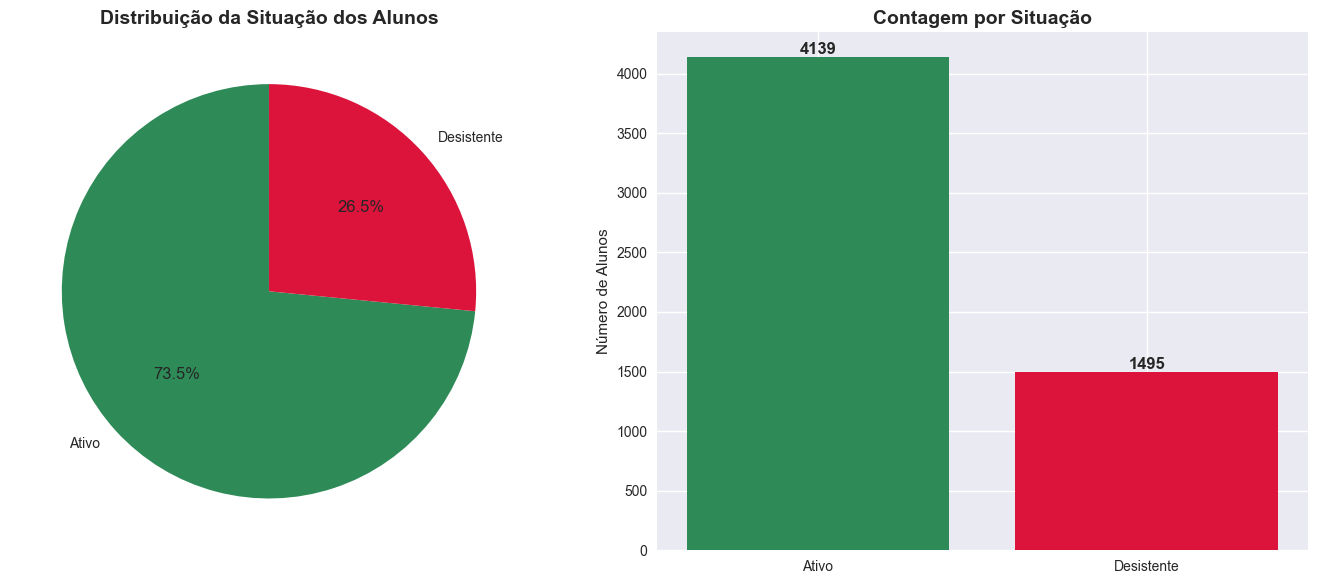

In [11]:
# Pergunta 1: Qual é a nossa taxa de evasão (churn rate) geral?

churn_counts = df_train['Situacao'].value_counts()
churn_rate = (churn_counts['Desistente'] / len(df_train)) * 100

print(f"📊 Taxa de Evasão Geral: {churn_rate:.2f}%")
print(f"Total de alunos: {len(df_train)}")
print(f"Alunos ativos: {churn_counts['Ativo']}")
print(f"Alunos desistentes: {churn_counts['Desistente']}")

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de pizza
colors = ['#2E8B57', '#DC143C']
ax1.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax1.set_title('Distribuição da Situação dos Alunos', fontsize=14, fontweight='bold')

# Gráfico de barras
bars = ax2.bar(churn_counts.index, churn_counts.values, color=colors)
ax2.set_title('Contagem por Situação', fontsize=14, fontweight='bold')
ax2.set_ylabel('Número de Alunos')

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Conclusões:**

Uma taxa de evasão de 26,54% é extremamente alta e preocupante. Significa que 1 em cada 4 alunos que se matriculam acaba desistindo. Isso representa uma perda financeira e de reputação significativa, tornando a redução da evasão uma prioridade máxima para a escola.

#### 5.2 📅 Em que momento do ciclo de vida do aluno a evasão é mais crítica?

📅 Desistências por Mês na Escola:
Meses com mais desistências: {1: 300, 2: 92, 3: 69}

📊 Taxa de Evasão por Faixa de Tempo:
             Total_Alunos  Desistentes  Taxa_Evasao
Faixa_Tempo                                        
1-3 meses             824          461        55.95
4-6 meses             338          150        44.38
7-12 meses            567          211        37.21
13-24 meses           818          234        28.61
24+ meses            3079          439        14.26


/var/folders/53/wpy9s6rs3hj8psqznk4szxk80000gn/T/ipykernel_25358/2284359027.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasao_por_faixa = df_train.groupby('Faixa_Tempo').agg({


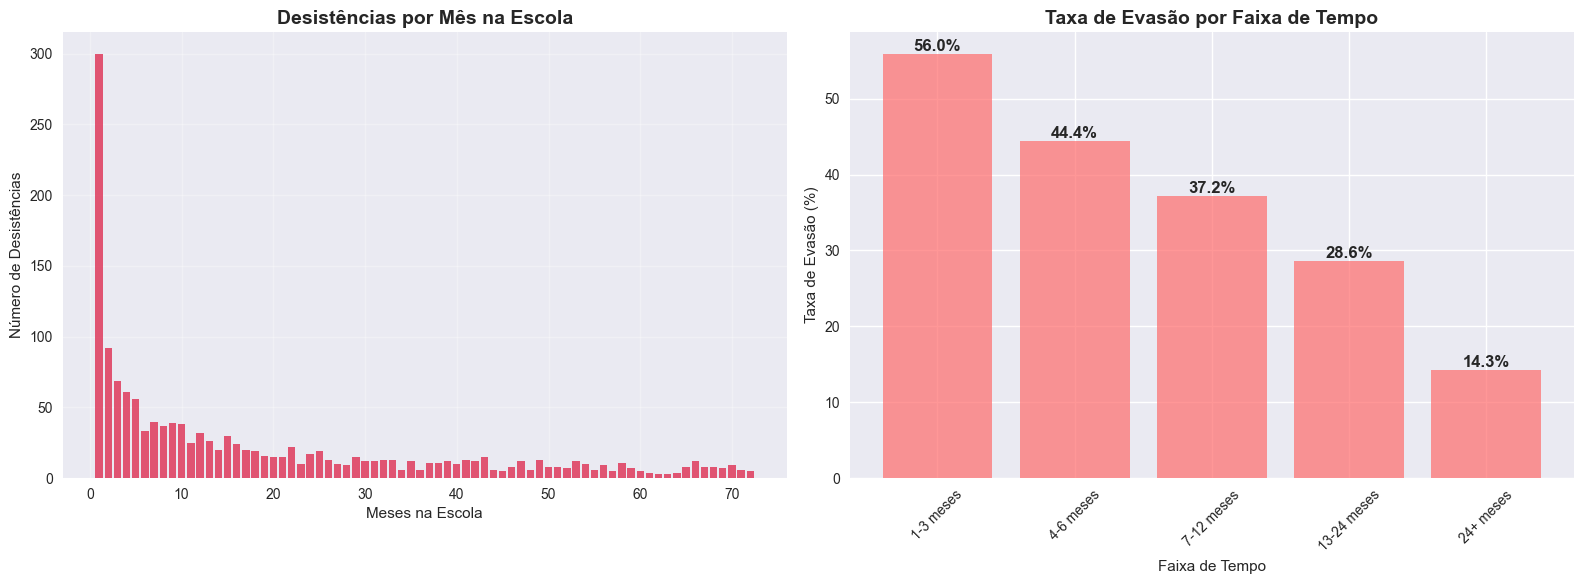

In [12]:
# Pergunta 2: Em que momento do ciclo de vida do aluno a evasão é mais crítica?

# Análise da evasão por meses na escola
desistencias_por_mes = df_train[df_train['Situacao'] == 'Desistente']['Meses_na_Escola'].value_counts().sort_index()

print("📅 Desistências por Mês na Escola:")
print(f"Meses com mais desistências: {desistencias_por_mes.head(3).to_dict()}")

# Criar faixas de tempo para melhor visualização
df_train['Faixa_Tempo'] = pd.cut(df_train['Meses_na_Escola'], 
                                bins=[0, 3, 6, 12, 24, float('inf')],
                                labels=['1-3 meses', '4-6 meses', '7-12 meses', '13-24 meses', '24+ meses'])

# Taxa de evasão por faixa de tempo
evasao_por_faixa = df_train.groupby('Faixa_Tempo').agg({
    'Desistencia': ['count', 'sum']
}).round(2)

evasao_por_faixa.columns = ['Total_Alunos', 'Desistentes']
evasao_por_faixa['Taxa_Evasao'] = (evasao_por_faixa['Desistentes'] / evasao_por_faixa['Total_Alunos'] * 100).round(2)

print("\n📊 Taxa de Evasão por Faixa de Tempo:")
print(evasao_por_faixa)

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histograma de desistências por mês
ax1.bar(desistencias_por_mes.index, desistencias_por_mes.values, alpha=0.7, color='#DC143C')
ax1.set_title('Desistências por Mês na Escola', fontsize=14, fontweight='bold')
ax1.set_xlabel('Meses na Escola')
ax1.set_ylabel('Número de Desistências')
ax1.grid(True, alpha=0.3)

# Taxa de evasão por faixa
bars = ax2.bar(range(len(evasao_por_faixa)), evasao_por_faixa['Taxa_Evasao'], 
               alpha=0.7, color='#FF6B6B')
ax2.set_title('Taxa de Evasão por Faixa de Tempo', fontsize=14, fontweight='bold')
ax2.set_xlabel('Faixa de Tempo')
ax2.set_ylabel('Taxa de Evasão (%)')
ax2.set_xticks(range(len(evasao_por_faixa)))
ax2.set_xticklabels(evasao_por_faixa.index, rotation=45)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Conclusões:**

O período mais crítico para a retenção de alunos são os primeiros 3 meses, onde a taxa de evasão é alarmante (55,95%). Mais de 30% de todas as desistências ocorrem nesse curto período. Isso indica falhas graves no processo de onboarding, desalinhamento de expectativas ou uma experiência inicial muito ruim para o aluno.

#### 5.3 🎯 A nossa pontuação de Risco_de_Desistencia é um bom indicador?

📊 Estatísticas do Risco de Desistência por Situação:
             count       mean        std   min   25%   50%   75%    max
Situacao                                                               
Ativo       4139.0  50.066683  17.740855   5.0  35.0  50.0  66.0   80.0
Desistente  1495.0  82.474247  10.343328  65.0  74.0  82.0  91.0  100.0

🎯 Análise do Indicador:
Risco médio - Alunos Ativos: 50.07
Risco médio - Alunos Desistentes: 82.47
Diferença: 32.41 pontos
Correlação Risco vs Desistência: 0.664


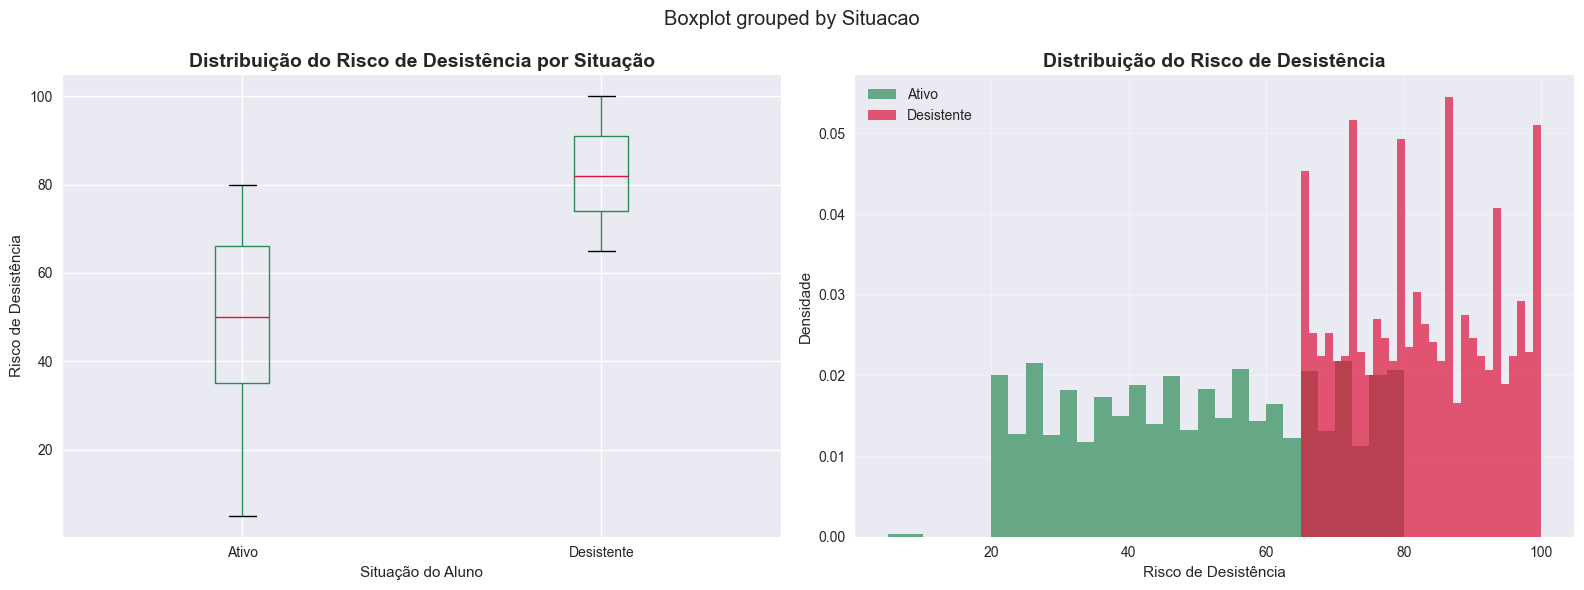

In [13]:
# Pergunta 3: A nossa pontuação de Risco_de_Desistencia é um bom indicador?

# Estatísticas descritivas do risco por situação
risco_stats = df_train.groupby('Situacao')['Risco_de_Desistencia'].describe()
print("📊 Estatísticas do Risco de Desistência por Situação:")
print(risco_stats)

# Diferença média entre grupos
media_ativo = df_train[df_train['Situacao'] == 'Ativo']['Risco_de_Desistencia'].mean()
media_desistente = df_train[df_train['Situacao'] == 'Desistente']['Risco_de_Desistencia'].mean()
diferenca = media_desistente - media_ativo

print(f"\n🎯 Análise do Indicador:")
print(f"Risco médio - Alunos Ativos: {media_ativo:.2f}")
print(f"Risco médio - Alunos Desistentes: {media_desistente:.2f}")
print(f"Diferença: {diferenca:.2f} pontos")

# Teste de correlação
correlation = df_train['Risco_de_Desistencia'].corr(df_train['Desistencia'])
print(f"Correlação Risco vs Desistência: {correlation:.3f}")

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
df_train.boxplot(column='Risco_de_Desistencia', by='Situacao', ax=ax1, color={'boxes': '#2E8B57', 'whiskers': '#2E8B57', 'medians': '#DC143C'})
ax1.set_title('Distribuição do Risco de Desistência por Situação', fontsize=14, fontweight='bold')
ax1.set_xlabel('Situação do Aluno')
ax1.set_ylabel('Risco de Desistência')

# Histograma sobreposto
ativo_risk = df_train[df_train['Situacao'] == 'Ativo']['Risco_de_Desistencia']
desistente_risk = df_train[df_train['Situacao'] == 'Desistente']['Risco_de_Desistencia']

ax2.hist(ativo_risk, bins=30, alpha=0.7, label='Ativo', color='#2E8B57', density=True)
ax2.hist(desistente_risk, bins=30, alpha=0.7, label='Desistente', color='#DC143C', density=True)
ax2.set_title('Distribuição do Risco de Desistência', fontsize=14, fontweight='bold')
ax2.set_xlabel('Risco de Desistência')
ax2.set_ylabel('Densidade')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Conclusões:**

O score Risco de Desistência é um excelente preditor de evasão. Ele diferencia claramente os dois grupos e pode ser usado como uma ferramenta proativa fundamental para identificar alunos em risco antes que eles pensem em sair.

#### 5.4 🧑‍🎓 Perfil e Demografia do Aluno

##### 5.4.1 Existem diferenças na evasão entre gêneros ou alunos bolsistas?

👨‍👩‍👧‍👦 Taxa de Evasão por Gênero:
        Total  Desistentes  Taxa_Evasao
Genero                                 
Female   2801          746        26.63
Male     2833          749        26.44

🎓 Taxa de Evasão por Tipo de Aluno (Bolsista):
                Total  Desistentes  Taxa_Evasao
Aluno_Bolsista                                 
Não              4714         1117        23.70
Sim               920          378        41.09


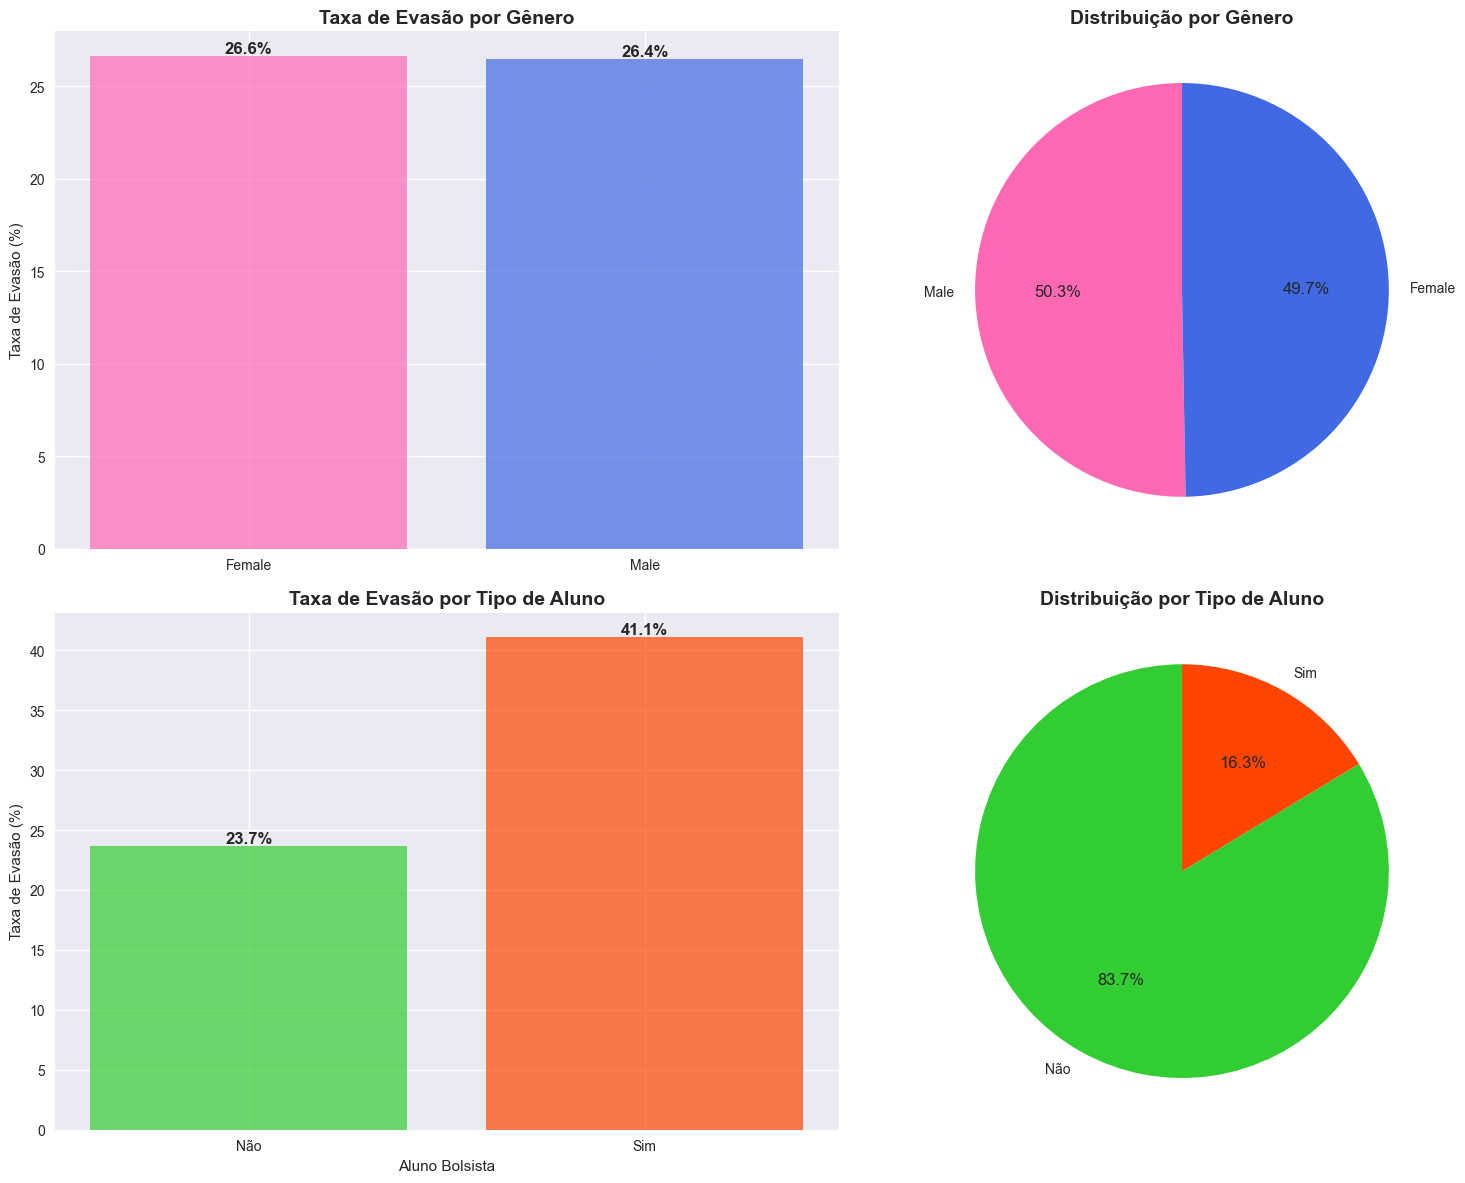

In [14]:
# Pergunta 4: Existem diferenças na evasão entre gêneros ou alunos bolsistas?

def calcular_taxa_evasao(df, coluna):
    """Função para calcular taxa de evasão por categoria"""
    grupo = df.groupby(coluna).agg({
        'Desistencia': ['count', 'sum']
    })
    grupo.columns = ['Total', 'Desistentes']
    grupo['Taxa_Evasao'] = (grupo['Desistentes'] / grupo['Total'] * 100).round(2)
    return grupo

# Análise por Gênero
evasao_genero = calcular_taxa_evasao(df_train, 'Genero')
print("👨‍👩‍👧‍👦 Taxa de Evasão por Gênero:")
print(evasao_genero)

# Análise por Bolsa
evasao_bolsa = calcular_taxa_evasao(df_train, 'Aluno_Bolsista')
print("\n🎓 Taxa de Evasão por Tipo de Aluno (Bolsista):")
print(evasao_bolsa)

# Visualização
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Taxa de evasão por gênero
bars1 = ax1.bar(evasao_genero.index, evasao_genero['Taxa_Evasao'], 
                color=['#FF69B4', '#4169E1'], alpha=0.7)
ax1.set_title('Taxa de Evasão por Gênero', fontsize=14, fontweight='bold')
ax1.set_ylabel('Taxa de Evasão (%)')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Distribuição por gênero
genero_counts = df_train['Genero'].value_counts()
ax2.pie(genero_counts.values, labels=genero_counts.index, autopct='%1.1f%%',
        colors=['#FF69B4', '#4169E1'], startangle=90)
ax2.set_title('Distribuição por Gênero', fontsize=14, fontweight='bold')

# Gráfico 3: Taxa de evasão por bolsa
bars3 = ax3.bar(evasao_bolsa.index, evasao_bolsa['Taxa_Evasao'], 
                color=['#32CD32', '#FF4500'], alpha=0.7)
ax3.set_title('Taxa de Evasão por Tipo de Aluno', fontsize=14, fontweight='bold')
ax3.set_ylabel('Taxa de Evasão (%)')
ax3.set_xlabel('Aluno Bolsista')
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico 4: Distribuição por bolsa
bolsa_counts = df_train['Aluno_Bolsista'].value_counts()
ax4.pie(bolsa_counts.values, labels=bolsa_counts.index, autopct='%1.1f%%',
        colors=['#32CD32', '#FF4500'], startangle=90)
ax4.set_title('Distribuição por Tipo de Aluno', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Conclusões:**

**Gênero é irrelevante para a evasão.**

**Alunos Bolsistas desistem quase o dobro (41,09%) dos não bolsistas (23,70%).** Isso é um alerta vermelho! Pode indicar que, apesar da bolsa, a pressão financeira continua alta, ou que esses alunos se sentem menos integrados.

##### 5.4.2 A estrutura familiar do aluno influencia na sua permanência?

👫 Taxa de Evasão por Responsável com Parceiro:
                          Total  Desistentes  Taxa_Evasao
Responsavel_com_Parceiro                                 
Não                        2905          952        32.77
Sim                        2729          543        19.90

👶 Taxa de Evasão por Aluno com Dependentes:
                          Total  Desistentes  Taxa_Evasao
Aluno_Possui_Dependentes                                 
Não                        4333         1416        32.68
Sim                        1301           79         6.07

📊 Taxa de Evasão Cruzada (Parceiro vs Dependentes):
Aluno_Possui_Dependentes    Não    Sim
Responsavel_com_Parceiro              
Não                       34.36  15.06
Sim                       29.99   4.05


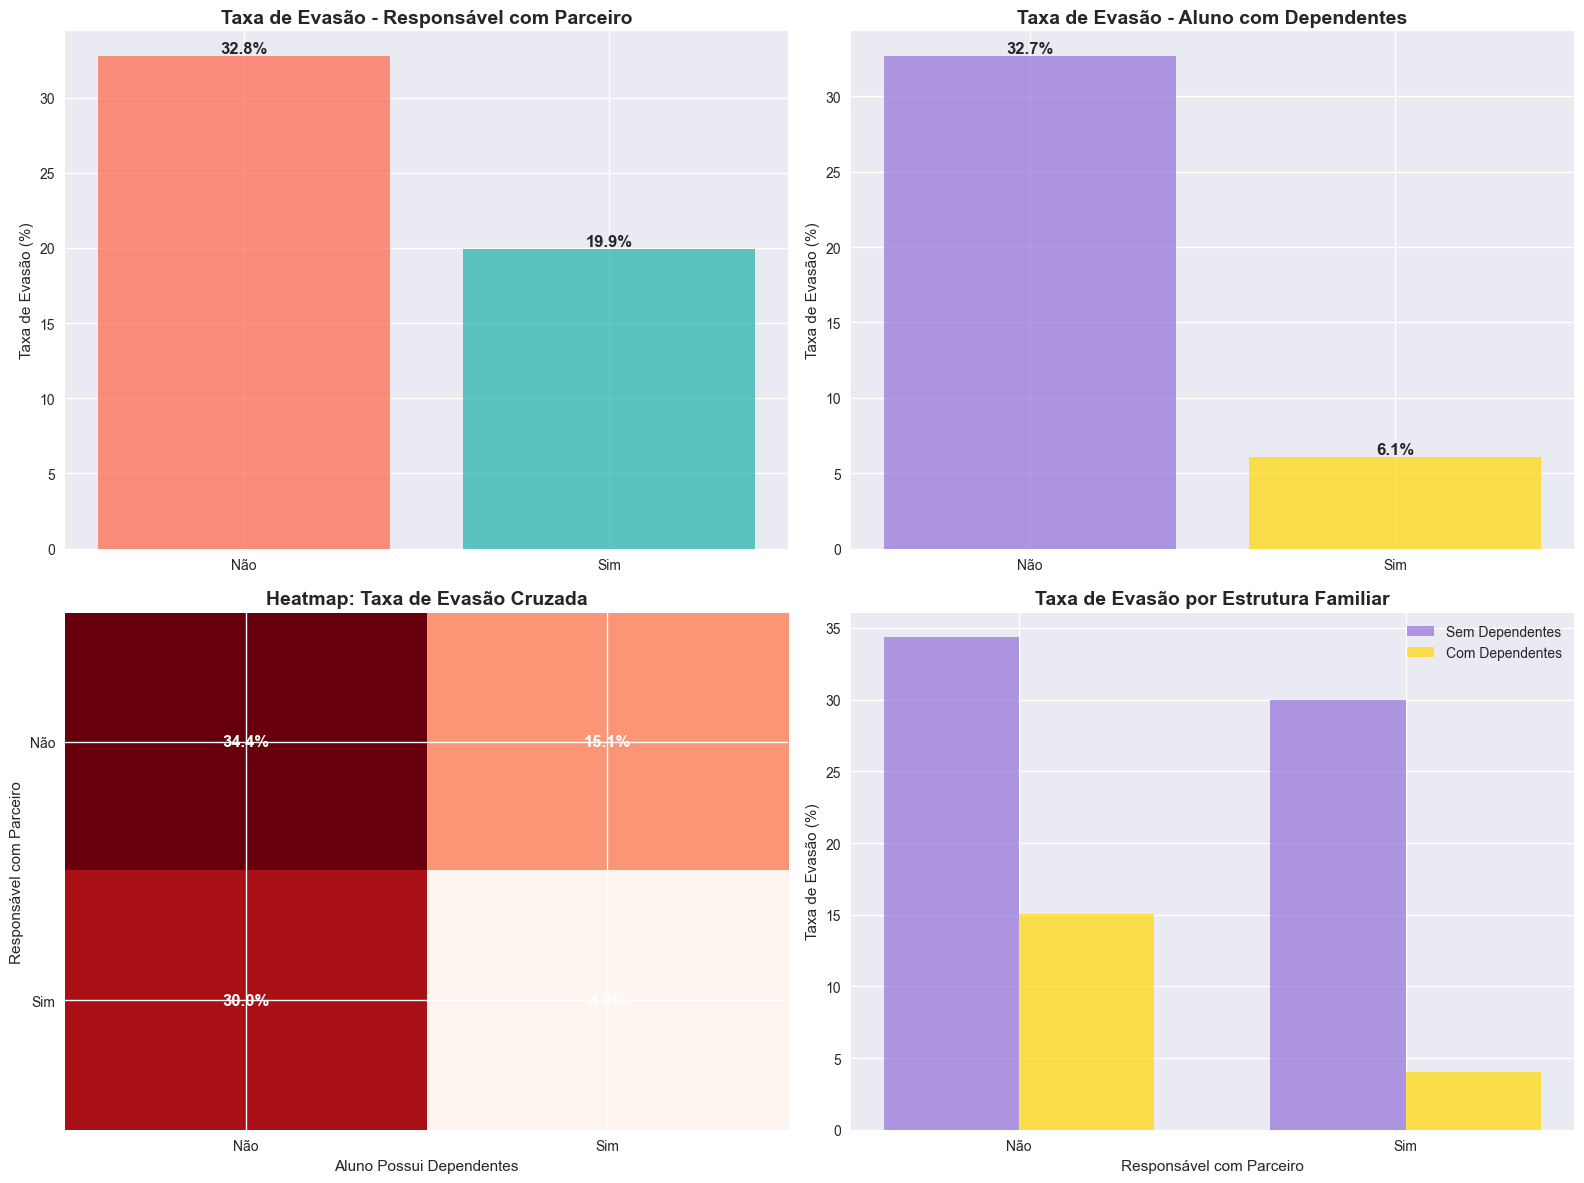

In [15]:
# Pergunta 5: A estrutura familiar do aluno influencia na sua permanência?

# Análise por Responsável com Parceiro
evasao_parceiro = calcular_taxa_evasao(df_train, 'Responsavel_com_Parceiro')
print("👫 Taxa de Evasão por Responsável com Parceiro:")
print(evasao_parceiro)

# Análise por Aluno com Dependentes
evasao_dependentes = calcular_taxa_evasao(df_train, 'Aluno_Possui_Dependentes')
print("\n👶 Taxa de Evasão por Aluno com Dependentes:")
print(evasao_dependentes)

# Análise cruzada: Parceiro vs Dependentes
crosstab = pd.crosstab(df_train['Responsavel_com_Parceiro'], 
                       df_train['Aluno_Possui_Dependentes'], 
                       df_train['Desistencia'], 
                       aggfunc='mean') * 100

print("\n📊 Taxa de Evasão Cruzada (Parceiro vs Dependentes):")
print(crosstab.round(2))

# Visualização
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Taxa de evasão por parceiro
bars1 = ax1.bar(evasao_parceiro.index, evasao_parceiro['Taxa_Evasao'], 
                color=['#FF6347', '#20B2AA'], alpha=0.7)
ax1.set_title('Taxa de Evasão - Responsável com Parceiro', fontsize=14, fontweight='bold')
ax1.set_ylabel('Taxa de Evasão (%)')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Taxa de evasão por dependentes
bars2 = ax2.bar(evasao_dependentes.index, evasao_dependentes['Taxa_Evasao'], 
                color=['#9370DB', '#FFD700'], alpha=0.7)
ax2.set_title('Taxa de Evasão - Aluno com Dependentes', fontsize=14, fontweight='bold')
ax2.set_ylabel('Taxa de Evasão (%)')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Heatmap da análise cruzada
im = ax3.imshow(crosstab.values, cmap='Reds', aspect='auto')
ax3.set_title('Heatmap: Taxa de Evasão Cruzada', fontsize=14, fontweight='bold')
ax3.set_xticks(range(len(crosstab.columns)))
ax3.set_yticks(range(len(crosstab.index)))
ax3.set_xticklabels(crosstab.columns)
ax3.set_yticklabels(crosstab.index)
ax3.set_xlabel('Aluno Possui Dependentes')
ax3.set_ylabel('Responsável com Parceiro')

# Adicionar valores no heatmap
for i in range(len(crosstab.index)):
    for j in range(len(crosstab.columns)):
        ax3.text(j, i, f'{crosstab.iloc[i, j]:.1f}%',
                ha='center', va='center', fontweight='bold', color='white')

# Gráfico de barras agrupadas para melhor comparação
x = np.arange(len(evasao_parceiro.index))
width = 0.35

dependentes_sim = df_train[df_train['Aluno_Possui_Dependentes'] == 'Sim'].groupby('Responsavel_com_Parceiro')['Desistencia'].mean() * 100
dependentes_nao = df_train[df_train['Aluno_Possui_Dependentes'] == 'Não'].groupby('Responsavel_com_Parceiro')['Desistencia'].mean() * 100

bars1 = ax4.bar(x - width/2, dependentes_nao, width, label='Sem Dependentes', alpha=0.7, color='#9370DB')
bars2 = ax4.bar(x + width/2, dependentes_sim, width, label='Com Dependentes', alpha=0.7, color='#FFD700')

ax4.set_title('Taxa de Evasão por Estrutura Familiar', fontsize=14, fontweight='bold')
ax4.set_ylabel('Taxa de Evasão (%)')
ax4.set_xlabel('Responsável com Parceiro')
ax4.set_xticks(x)
ax4.set_xticklabels(evasao_parceiro.index)
ax4.legend()

plt.tight_layout()
plt.show()

**Conclusões:**

**Ter um ambiente familiar estável (Responsável com Parceiro) é um forte fator de retenção** (evasão de 19,90% vs 32,77%).

**Surpreendentemente, alunos que possuem seus próprios dependentes são os mais leais**, com uma taxa de evasão ínfima (6,07%). Esse grupo provavelmente tem um senso de propósito e maturidade muito maior.

#### 5.5 📚 Engajamento com os Serviços Educacionais

##### 5.5.1 Qual modalidade de ensino possui a maior taxa de evasão?

🎓 Taxa de Evasão por Modalidade de Ensino:
                   Total  Desistentes  Taxa_Evasao
Modalidade_Ensino                                 
Híbrido             2483         1045        42.09
Presencial          1937          362        18.69
EAD                 1214           88         7.25


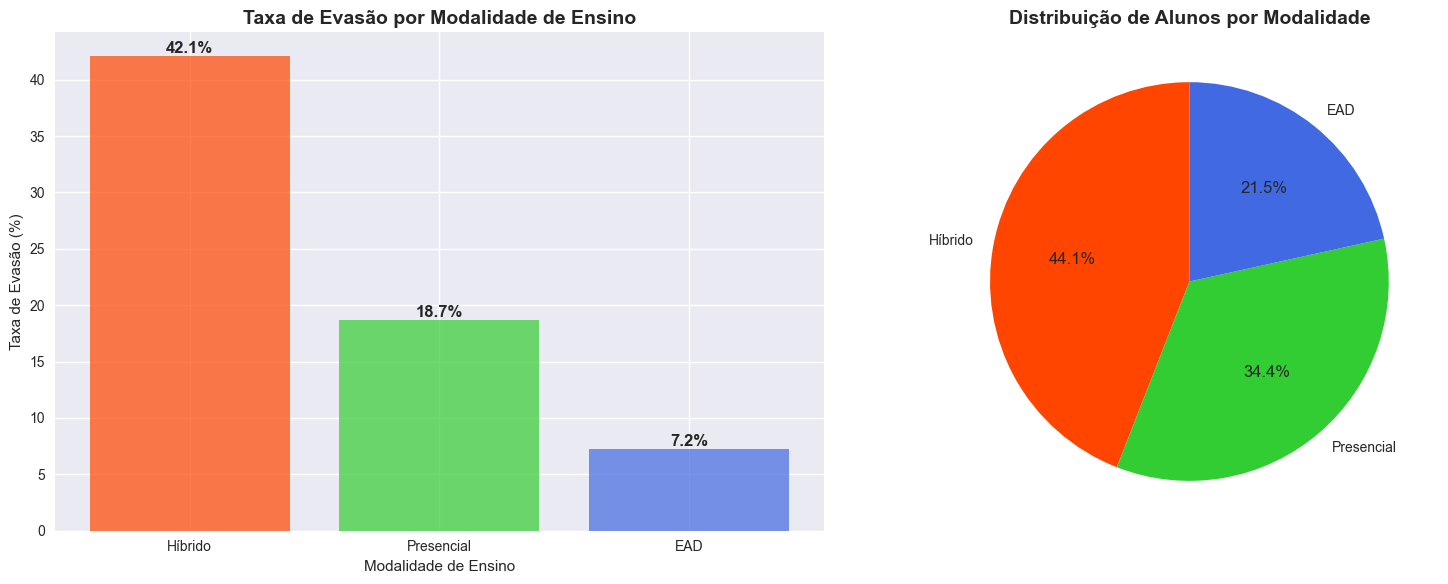

In [16]:
# Pergunta 6: Qual modalidade de ensino possui a maior taxa de evasão?

evasao_modalidade = calcular_taxa_evasao(df_train, 'Modalidade_Ensino')
print("🎓 Taxa de Evasão por Modalidade de Ensino:")
print(evasao_modalidade.sort_values('Taxa_Evasao', ascending=False))

# Visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Taxa de evasão por modalidade
modalidades = evasao_modalidade.sort_values('Taxa_Evasao', ascending=False)
colors = ['#FF4500', '#32CD32', '#4169E1']
bars1 = ax1.bar(modalidades.index, modalidades['Taxa_Evasao'], 
                color=colors, alpha=0.7)
ax1.set_title('Taxa de Evasão por Modalidade de Ensino', fontsize=14, fontweight='bold')
ax1.set_ylabel('Taxa de Evasão (%)')
ax1.set_xlabel('Modalidade de Ensino')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Distribuição de alunos por modalidade
modalidade_dist = df_train['Modalidade_Ensino'].value_counts()
ax2.pie(modalidade_dist.values, labels=modalidade_dist.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Distribuição de Alunos por Modalidade', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Conclusões:**

**A modalidade Híbrida é um desastre de retenção**, com uma taxa de evasão de 42,09%. Ela é o principal foco do problema.

A modalidade Presencial tem um desempenho moderado (18,69%).

**A modalidade EAD é um sucesso de retenção** (7,25%).

##### 5.5.2 O uso de serviços de apoio está associado a uma menor evasão?

🆘 Impacto dos Serviços de Apoio na Evasão:

Apoio_Psicopedagogico:
                       Total  Desistentes  Taxa_Evasao
Apoio_Psicopedagogico                                 
Não                     2797         1173        41.94
Não se aplica           1214           88         7.25
Sim                     1623          234        14.42
Diferença: 27.52 p.p. (menor evasão para quem usa)

Reforco_Escolar:
                 Total  Desistentes  Taxa_Evasao
Reforco_Escolar                                 
Não               2442          980        40.13
Não se aplica     1214           88         7.25
Sim               1978          427        21.59
Diferença: 18.54 p.p. (menor evasão para quem usa)


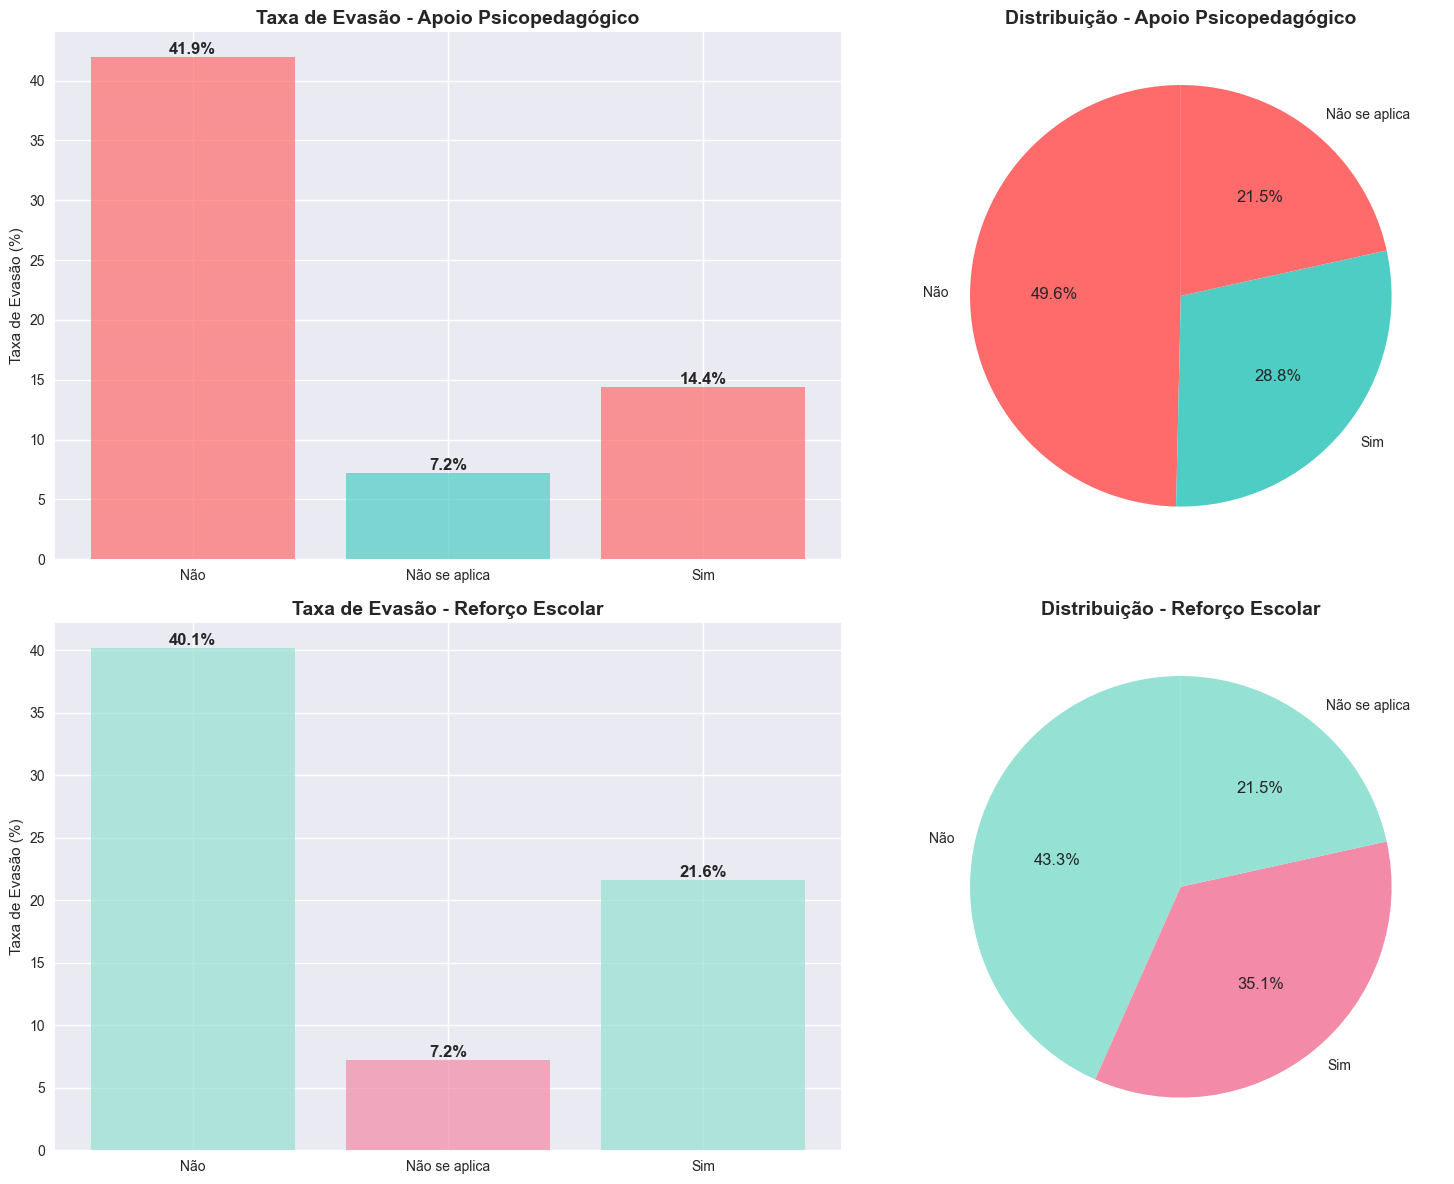

In [17]:
# Pergunta 7: O uso de serviços de apoio está associado a uma menor evasão?

# Lista de serviços de apoio
servicos_apoio = ['Apoio_Psicopedagogico', 'Reforco_Escolar']

print("🆘 Impacto dos Serviços de Apoio na Evasão:")
resultados_servicos = {}

for servico in servicos_apoio:
    evasao_servico = calcular_taxa_evasao(df_train, servico)
    resultados_servicos[servico] = evasao_servico
    print(f"\n{servico}:")
    print(evasao_servico)
    
    # Calcular diferença
    usa_servico = evasao_servico.loc['Sim', 'Taxa_Evasao']
    nao_usa_servico = evasao_servico.loc['Não', 'Taxa_Evasao']
    diferenca = nao_usa_servico - usa_servico
    print(f"Diferença: {diferenca:.2f} p.p. (menor evasão para quem usa)")

# Visualização
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Apoio Psicopedagógico
apoio_psico = resultados_servicos['Apoio_Psicopedagogico']
bars1 = ax1.bar(apoio_psico.index, apoio_psico['Taxa_Evasao'], 
                color=['#FF6B6B', '#4ECDC4'], alpha=0.7)
ax1.set_title('Taxa de Evasão - Apoio Psicopedagógico', fontsize=14, fontweight='bold')
ax1.set_ylabel('Taxa de Evasão (%)')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Distribuição Apoio Psicopedagógico
psico_dist = df_train['Apoio_Psicopedagogico'].value_counts()
ax2.pie(psico_dist.values, labels=psico_dist.index, autopct='%1.1f%%',
        colors=['#FF6B6B', '#4ECDC4'], startangle=90)
ax2.set_title('Distribuição - Apoio Psicopedagógico', fontsize=14, fontweight='bold')

# Reforço Escolar
reforco = resultados_servicos['Reforco_Escolar']
bars3 = ax3.bar(reforco.index, reforco['Taxa_Evasao'], 
                color=['#95E1D3', '#F38BA8'], alpha=0.7)
ax3.set_title('Taxa de Evasão - Reforço Escolar', fontsize=14, fontweight='bold')
ax3.set_ylabel('Taxa de Evasão (%)')
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Distribuição Reforço Escolar
reforco_dist = df_train['Reforco_Escolar'].value_counts()
ax4.pie(reforco_dist.values, labels=reforco_dist.index, autopct='%1.1f%%',
        colors=['#95E1D3', '#F38BA8'], startangle=90)
ax4.set_title('Distribuição - Reforço Escolar', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Conclusões:**

**Serviços de Apoio Psicopedagógico e Reforço Escolar são extremamente eficazes.** Alunos que os utilizam têm uma taxa de evasão drasticamente menor. O problema não é a qualidade do serviço, mas provavelmente a sua adoção.

##### 5.5.3 O engajamento em atividades extracurriculares ajuda na retenção?

🎯 Taxa de Evasão - Participação em Atividade Extra:
                           Total  Desistentes  Taxa_Evasao
Participa_Atividade_Extra                                 
Não                          559          135        24.15
Sim                         5075         1360        26.80

🎭 Taxa de Evasão - Múltiplas Atividades (entre participantes):
                            Total  Desistentes  Taxa_Evasao
Multiplas_Atividades_Extra                                 
Não                          2685          672        25.03
Sim                          2390          688        28.79

📊 Análise Detalhada de Atividades Extracurriculares:
                                                      Total  Desistentes  \
Participa_Atividade_Extra Multiplas_Atividades_Extra                       
Não                       Não participa                 559          135   
Sim                       Não                          2685          672   
                          Sim                     

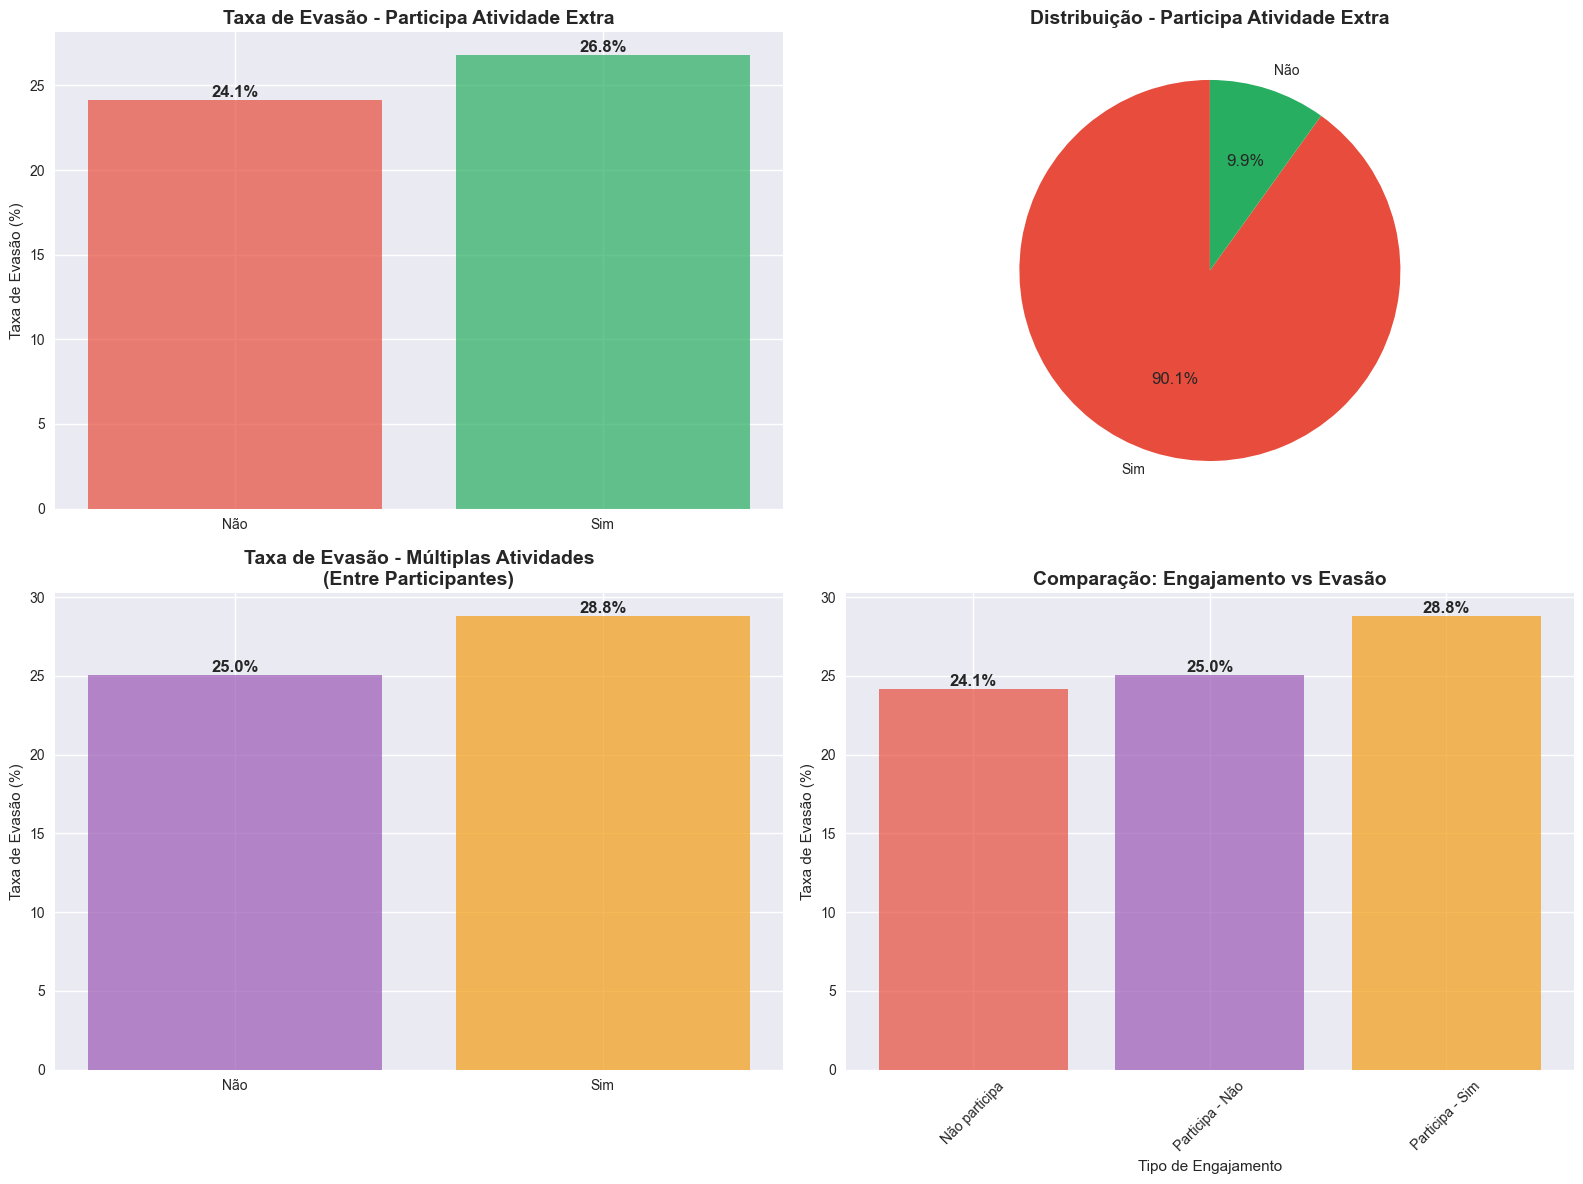

In [18]:
# Pergunta 8: O engajamento em atividades extracurriculares ajuda na retenção?

# Análise de participação em atividades extra
evasao_atividade = calcular_taxa_evasao(df_train, 'Participa_Atividade_Extra')
print("🎯 Taxa de Evasão - Participação em Atividade Extra:")
print(evasao_atividade)

# Análise de múltiplas atividades (apenas para quem participa)
df_participa = df_train[df_train['Participa_Atividade_Extra'] == 'Sim']
evasao_multiplas = calcular_taxa_evasao(df_participa, 'Multiplas_Atividades_Extra')
print("\n🎭 Taxa de Evasão - Múltiplas Atividades (entre participantes):")
print(evasao_multiplas)

# Análise detalhada combinando ambos os fatores
atividade_detalhada = df_train.groupby(['Participa_Atividade_Extra', 'Multiplas_Atividades_Extra']).agg({
    'Desistencia': ['count', 'sum', 'mean']
}).round(3)
atividade_detalhada.columns = ['Total', 'Desistentes', 'Taxa_Evasao']
atividade_detalhada['Taxa_Evasao'] = atividade_detalhada['Taxa_Evasao'] * 100

print("\n📊 Análise Detalhada de Atividades Extracurriculares:")
print(atividade_detalhada)

# Visualização
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Taxa de evasão - Participação
bars1 = ax1.bar(evasao_atividade.index, evasao_atividade['Taxa_Evasao'], 
                color=['#E74C3C', '#27AE60'], alpha=0.7)
ax1.set_title('Taxa de Evasão - Participa Atividade Extra', fontsize=14, fontweight='bold')
ax1.set_ylabel('Taxa de Evasão (%)')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Distribuição - Participação
participa_dist = df_train['Participa_Atividade_Extra'].value_counts()
ax2.pie(participa_dist.values, labels=participa_dist.index, autopct='%1.1f%%',
        colors=['#E74C3C', '#27AE60'], startangle=90)
ax2.set_title('Distribuição - Participa Atividade Extra', fontsize=14, fontweight='bold')

# Taxa de evasão - Múltiplas atividades
bars3 = ax3.bar(evasao_multiplas.index, evasao_multiplas['Taxa_Evasao'], 
                color=['#9B59B6', '#F39C12'], alpha=0.7)
ax3.set_title('Taxa de Evasão - Múltiplas Atividades\n(Entre Participantes)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Taxa de Evasão (%)')
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico de barras agrupadas - Análise combinada
grupos = ['Não participa', 'Participa - Não', 'Participa - Sim']
valores = [
    evasao_atividade.loc['Não', 'Taxa_Evasao'],
    evasao_multiplas.loc['Não', 'Taxa_Evasao'],
    evasao_multiplas.loc['Sim', 'Taxa_Evasao']
]

bars4 = ax4.bar(grupos, valores, color=['#E74C3C', '#9B59B6', '#F39C12'], alpha=0.7)
ax4.set_title('Comparação: Engajamento vs Evasão', fontsize=14, fontweight='bold')
ax4.set_ylabel('Taxa de Evasão (%)')
ax4.set_xlabel('Tipo de Engajamento')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Conclusões:**

Este é um insight contraintuitivo e valioso. **Ao contrário do que se espera, participar de atividades extras (especialmente múltiplas) está associado a uma taxa de evasão ligeiramente maior.** Isso pode indicar que os alunos mais engajados em atividades paralelas são os da modalidade Híbrida (que tem a maior evasão) ou que há um excesso de compromissos que leva ao esgotamento.

#### 5.6 💰 Fatores Financeiros e Contratuais

##### 5.6.1 O tipo de contrato de matrícula é um fator determinante para a evasão?

📋 Taxa de Evasão por Tipo de Contrato:
                         Total  Desistentes  Taxa_Evasao
Tipo_Contrato_Matricula                                 
Mensal                    3102         1326        42.75
Anual                     1173          130        11.08
Plano de Ciclo Completo   1359           39         2.87

📅 Permanência Média por Tipo de Contrato:
                         Media_Meses  Mediana_Meses  Desvio_Padrao
Tipo_Contrato_Matricula                                           
Anual                          42.44           44.0          18.90
Mensal                         18.13           12.0          17.74
Plano de Ciclo Completo        56.65           64.0          18.32


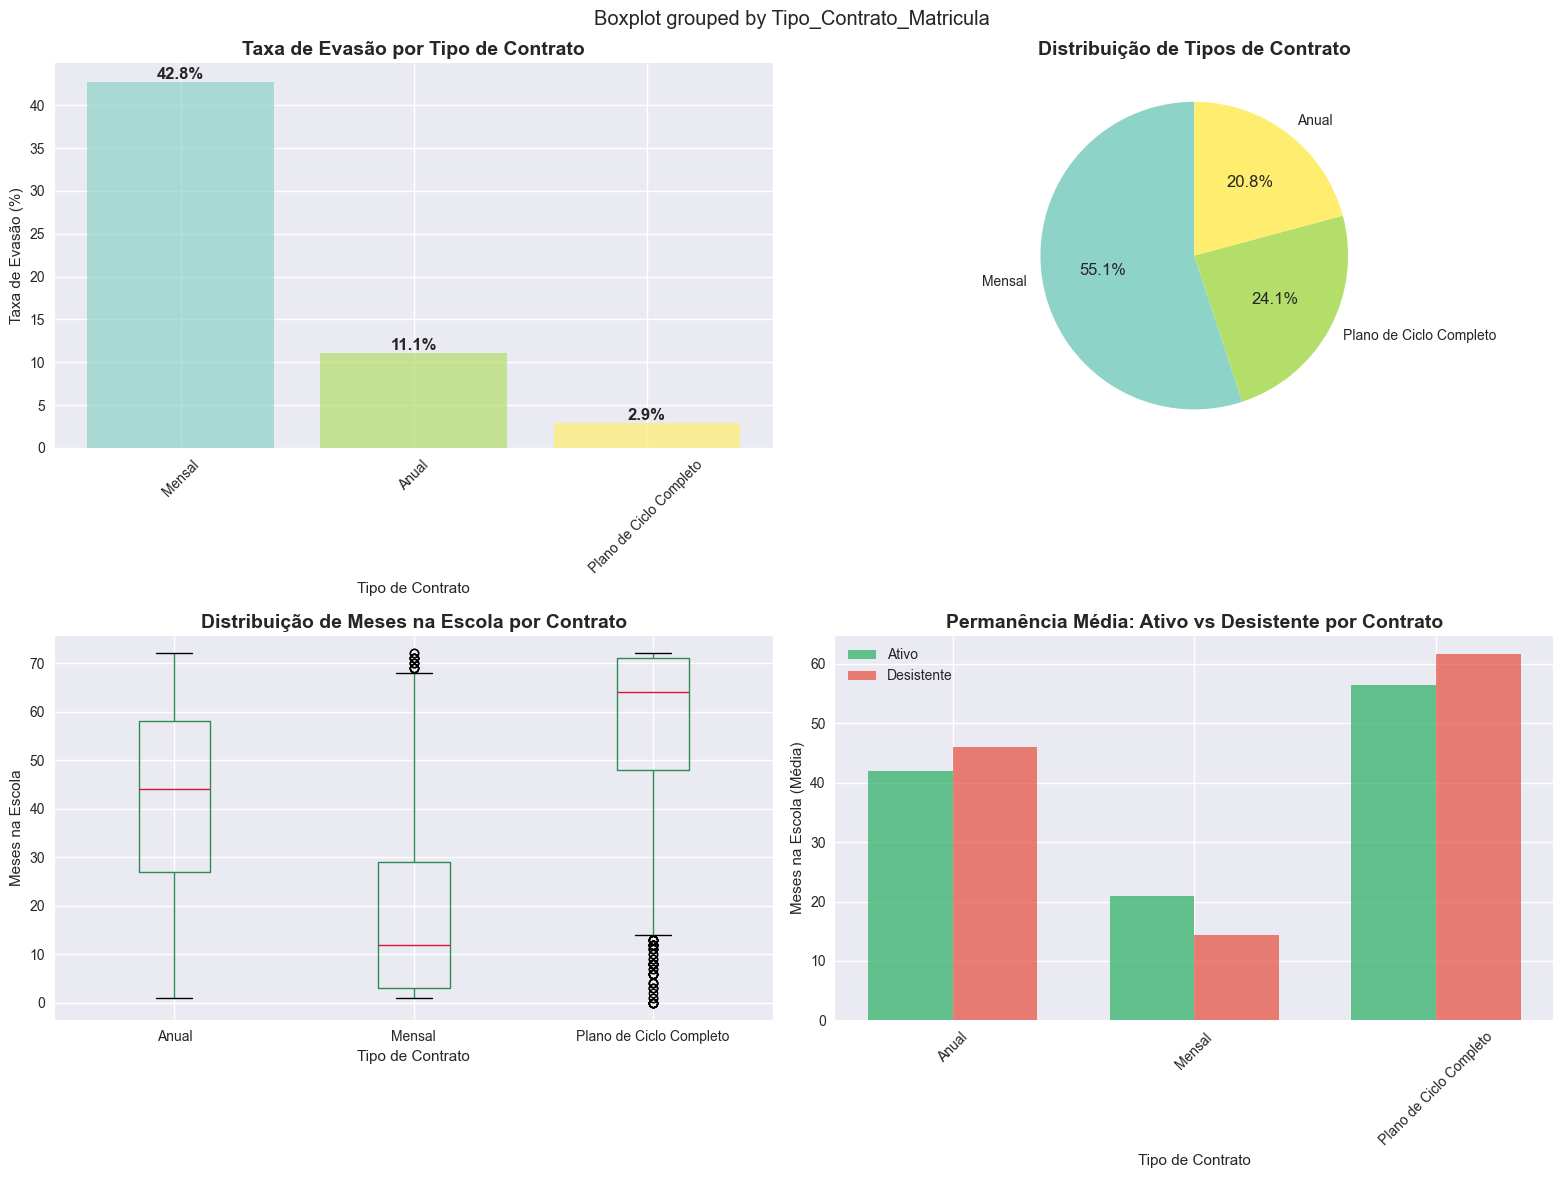

In [19]:
# Pergunta 9: O tipo de contrato de matrícula é um fator determinante para a evasão?

evasao_contrato = calcular_taxa_evasao(df_train, 'Tipo_Contrato_Matricula')
print("📋 Taxa de Evasão por Tipo de Contrato:")
print(evasao_contrato.sort_values('Taxa_Evasao', ascending=False))

# Análise de permanência média por tipo de contrato
permanencia_contrato = df_train.groupby('Tipo_Contrato_Matricula').agg({
    'Meses_na_Escola': ['mean', 'median', 'std']
}).round(2)
permanencia_contrato.columns = ['Media_Meses', 'Mediana_Meses', 'Desvio_Padrao']

print("\n📅 Permanência Média por Tipo de Contrato:")
print(permanencia_contrato)

# Visualização
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Taxa de evasão por contrato
contrato_ordenado = evasao_contrato.sort_values('Taxa_Evasao', ascending=False)
colors = plt.cm.Set3(np.linspace(0, 1, len(contrato_ordenado)))
bars1 = ax1.bar(range(len(contrato_ordenado)), contrato_ordenado['Taxa_Evasao'], 
                color=colors, alpha=0.7)
ax1.set_title('Taxa de Evasão por Tipo de Contrato', fontsize=14, fontweight='bold')
ax1.set_ylabel('Taxa de Evasão (%)')
ax1.set_xlabel('Tipo de Contrato')
ax1.set_xticks(range(len(contrato_ordenado)))
ax1.set_xticklabels(contrato_ordenado.index, rotation=45)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Distribuição de contratos
contrato_dist = df_train['Tipo_Contrato_Matricula'].value_counts()
ax2.pie(contrato_dist.values, labels=contrato_dist.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Distribuição de Tipos de Contrato', fontsize=14, fontweight='bold')

# Boxplot de permanência por contrato
df_train.boxplot(column='Meses_na_Escola', by='Tipo_Contrato_Matricula', ax=ax3, color={'boxes': '#2E8B57', 'whiskers': '#2E8B57', 'medians': '#DC143C'})
ax3.set_title('Distribuição de Meses na Escola por Contrato', fontsize=14, fontweight='bold')
ax3.set_xlabel('Tipo de Contrato')
ax3.set_ylabel('Meses na Escola')

# Comparação: Ativos vs Desistentes por contrato
comparacao_contrato = df_train.groupby(['Tipo_Contrato_Matricula', 'Situacao'])['Meses_na_Escola'].mean().unstack()

x = np.arange(len(comparacao_contrato.index))
width = 0.35

bars_ativo = ax4.bar(x - width/2, comparacao_contrato['Ativo'], width, 
                     label='Ativo', alpha=0.7, color='#27AE60')
bars_desistente = ax4.bar(x + width/2, comparacao_contrato['Desistente'], width, 
                          label='Desistente', alpha=0.7, color='#E74C3C')

ax4.set_title('Permanência Média: Ativo vs Desistente por Contrato', fontsize=14, fontweight='bold')
ax4.set_ylabel('Meses na Escola (Média)')
ax4.set_xlabel('Tipo de Contrato')
ax4.set_xticks(x)
ax4.set_xticklabels(comparacao_contrato.index, rotation=45)
ax4.legend()

plt.tight_layout()
plt.show()

**Conclusões:**

**O tipo de contrato é o fator mais poderoso de fidelização.** O contrato Mensal (42,75% de evasão) é uma "porta giratória" para a saída de alunos. Contratos de longo prazo (Anual e Plano de Ciclo Completo) garantem a permanência.

##### 5.6.2 Existe uma relação entre o valor da mensalidade e a probabilidade de desistência?

💵 Estatísticas da Mensalidade por Situação:
             count       mean        std    min    25%    50%     75%     max
Situacao                                                                     
Ativo       4139.0  61.343187  31.135396  18.40  25.15  64.40  88.175  118.75
Desistente  1495.0  74.860167  24.603757  18.85  56.90  79.95  94.400  118.35

🔗 Correlação Mensalidade vs Desistência: 0.198

📊 Taxa de Evasão por Faixa de Mensalidade:
                   Total  Desistentes  Taxa_Evasao
Faixa_Mensalidade                                 
Muito Baixa         1432          160        11.17
Baixa                803          216        26.90
Média               1069          306        28.62
Alta                1478          553        37.42
Muito Alta           852          260        30.52


/var/folders/53/wpy9s6rs3hj8psqznk4szxk80000gn/T/ipykernel_25358/635305624.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df.groupby(coluna).agg({


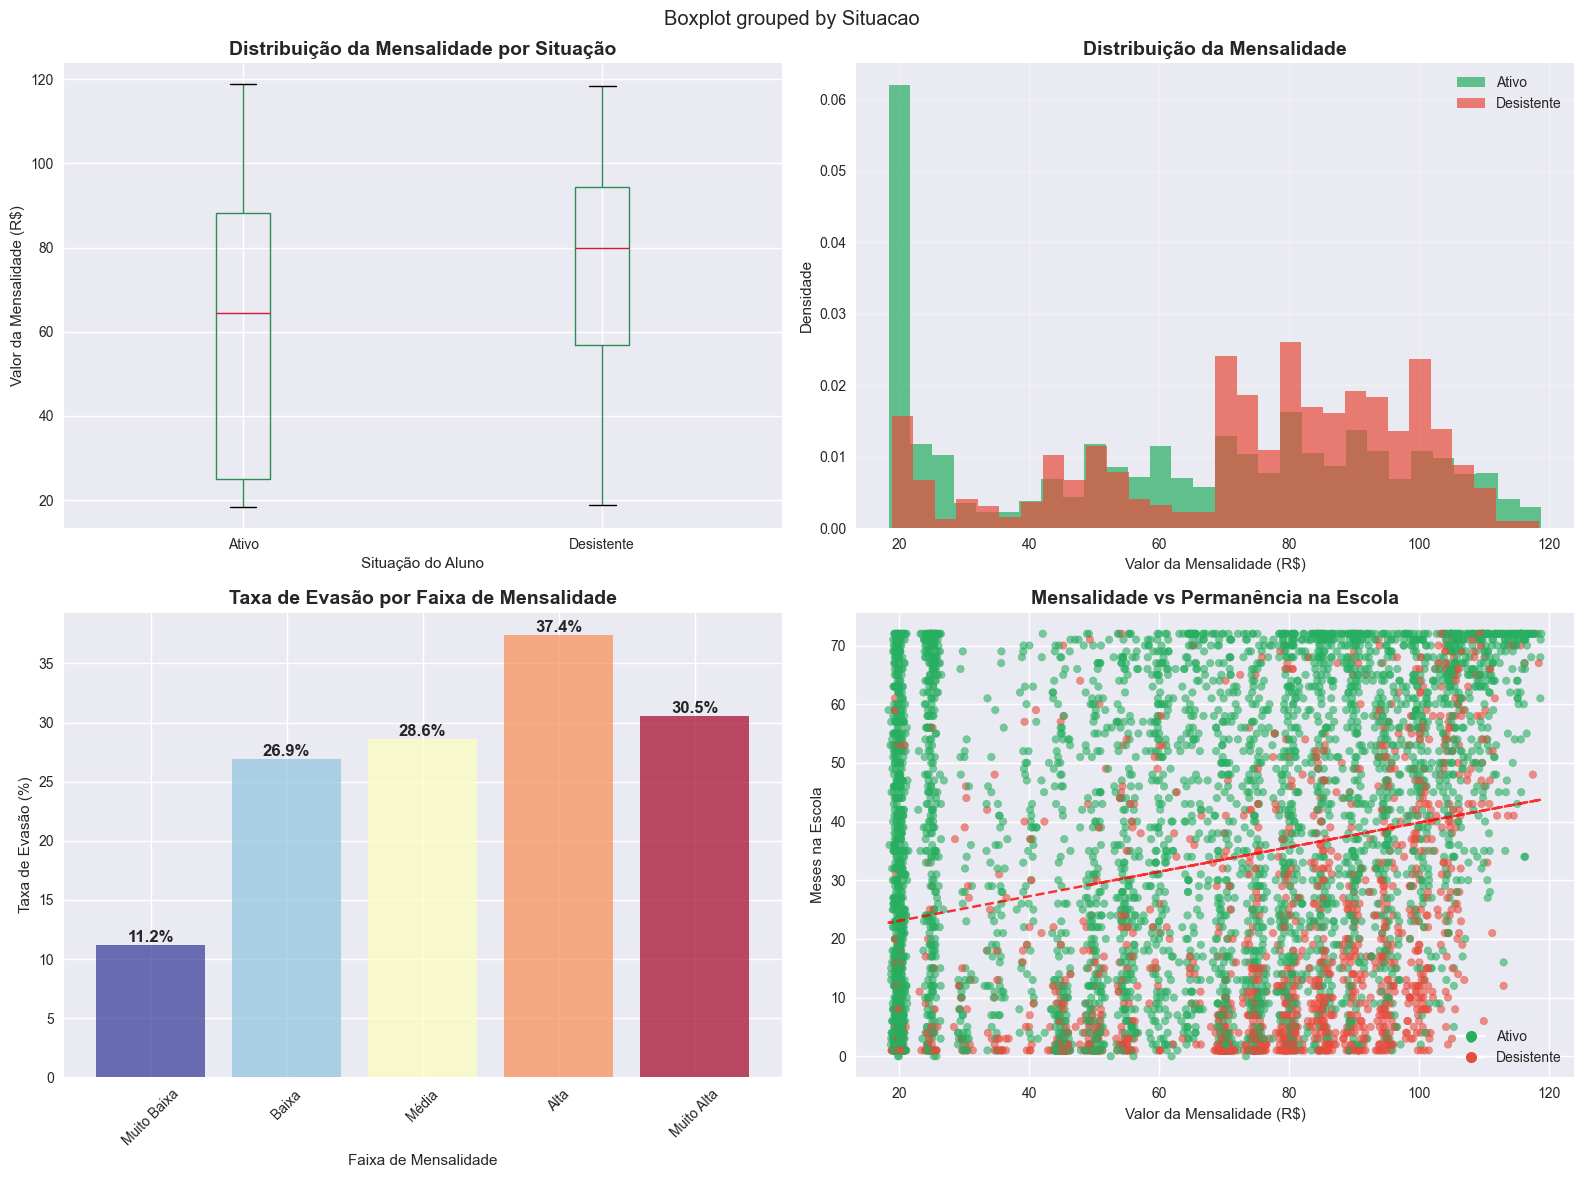

In [20]:
# Pergunta 10: Existe uma relação entre o valor da mensalidade e a probabilidade de desistência?

# Estatísticas descritivas por situação
mensalidade_stats = df_train.groupby('Situacao')['Valor_Mensalidade'].describe()
print("💵 Estatísticas da Mensalidade por Situação:")
print(mensalidade_stats)

# Correlação
correlacao_mensalidade = df_train['Valor_Mensalidade'].corr(df_train['Desistencia'])
print(f"\n🔗 Correlação Mensalidade vs Desistência: {correlacao_mensalidade:.3f}")

# Criar faixas de mensalidade
df_train['Faixa_Mensalidade'] = pd.cut(df_train['Valor_Mensalidade'], 
                                      bins=5, 
                                      labels=['Muito Baixa', 'Baixa', 'Média', 'Alta', 'Muito Alta'])

evasao_faixa_mensalidade = calcular_taxa_evasao(df_train, 'Faixa_Mensalidade')
print("\n📊 Taxa de Evasão por Faixa de Mensalidade:")
print(evasao_faixa_mensalidade)

# Visualização
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot da mensalidade por situação
df_train.boxplot(column='Valor_Mensalidade', by='Situacao', ax=ax1, color={'boxes': '#2E8B57', 'whiskers': '#2E8B57', 'medians': '#DC143C'})
ax1.set_title('Distribuição da Mensalidade por Situação', fontsize=14, fontweight='bold')
ax1.set_xlabel('Situação do Aluno')
ax1.set_ylabel('Valor da Mensalidade (R$)')

# Histograma sobreposto
ativo_mensalidade = df_train[df_train['Situacao'] == 'Ativo']['Valor_Mensalidade']
desistente_mensalidade = df_train[df_train['Situacao'] == 'Desistente']['Valor_Mensalidade']

ax2.hist(ativo_mensalidade, bins=30, alpha=0.7, label='Ativo', color='#27AE60', density=True)
ax2.hist(desistente_mensalidade, bins=30, alpha=0.7, label='Desistente', color='#E74C3C', density=True)
ax2.set_title('Distribuição da Mensalidade', fontsize=14, fontweight='bold')
ax2.set_xlabel('Valor da Mensalidade (R$)')
ax2.set_ylabel('Densidade')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Taxa de evasão por faixa de mensalidade
bars3 = ax3.bar(range(len(evasao_faixa_mensalidade)), evasao_faixa_mensalidade['Taxa_Evasao'], 
                color=plt.cm.RdYlBu_r(np.linspace(0, 1, len(evasao_faixa_mensalidade))), alpha=0.7)
ax3.set_title('Taxa de Evasão por Faixa de Mensalidade', fontsize=14, fontweight='bold')
ax3.set_ylabel('Taxa de Evasão (%)')
ax3.set_xlabel('Faixa de Mensalidade')
ax3.set_xticks(range(len(evasao_faixa_mensalidade)))
ax3.set_xticklabels(evasao_faixa_mensalidade.index, rotation=45)

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Scatter plot: Mensalidade vs Meses na Escola
colors = ['#27AE60' if x == 'Ativo' else '#E74C3C' for x in df_train['Situacao']]
ax4.scatter(df_train['Valor_Mensalidade'], df_train['Meses_na_Escola'], 
            c=colors, alpha=0.6, s=30)
ax4.set_title('Mensalidade vs Permanência na Escola', fontsize=14, fontweight='bold')
ax4.set_xlabel('Valor da Mensalidade (R$)')
ax4.set_ylabel('Meses na Escola')

# Adicionar linha de tendência
z = np.polyfit(df_train['Valor_Mensalidade'], df_train['Meses_na_Escola'], 1)
p = np.poly1d(z)
ax4.plot(df_train['Valor_Mensalidade'], p(df_train['Valor_Mensalidade']), "r--", alpha=0.8)

# Legenda personalizada
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#27AE60', markersize=8, label='Ativo'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='#E74C3C', markersize=8, label='Desistente')]
ax4.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

**Conclusões:**

A mensalidade tem um impacto, mas a relação não é linear. A evasão aumenta com a mensalidade, mas cai na faixa "Muito Alta", sugerindo que há uma percepção de valor ruim nas faixas "Média" e "Alta", que provavelmente correspondem à modalidade Híbrida.

##### 5.6.3 A forma de pagamento está ligada à evasão?

💳 Taxa de Evasão por Forma de Pagamento:
                              Total  Desistentes  Taxa_Evasao
Forma_Pagamento_Mensalidade                                  
Boleto Digital                 1891          865        45.74
Boleto Impresso                1286          248        19.28
Débito Automático              1244          201        16.16
Cartão de Crédito Recorrente   1213          181        14.92

💰 Valor Médio da Mensalidade por Forma de Pagamento:
                             Valor_Mensalidade               Meses_na_Escola  \
                                          mean median    std            mean   
Forma_Pagamento_Mensalidade                                                    
Boleto Digital                           76.33  80.60  23.84           25.31   
Boleto Impresso                          43.81  34.10  26.27           21.78   
Cartão de Crédito Recorrente             66.67  73.25  30.77           43.39   
Débito Automático                        67.73  74.40

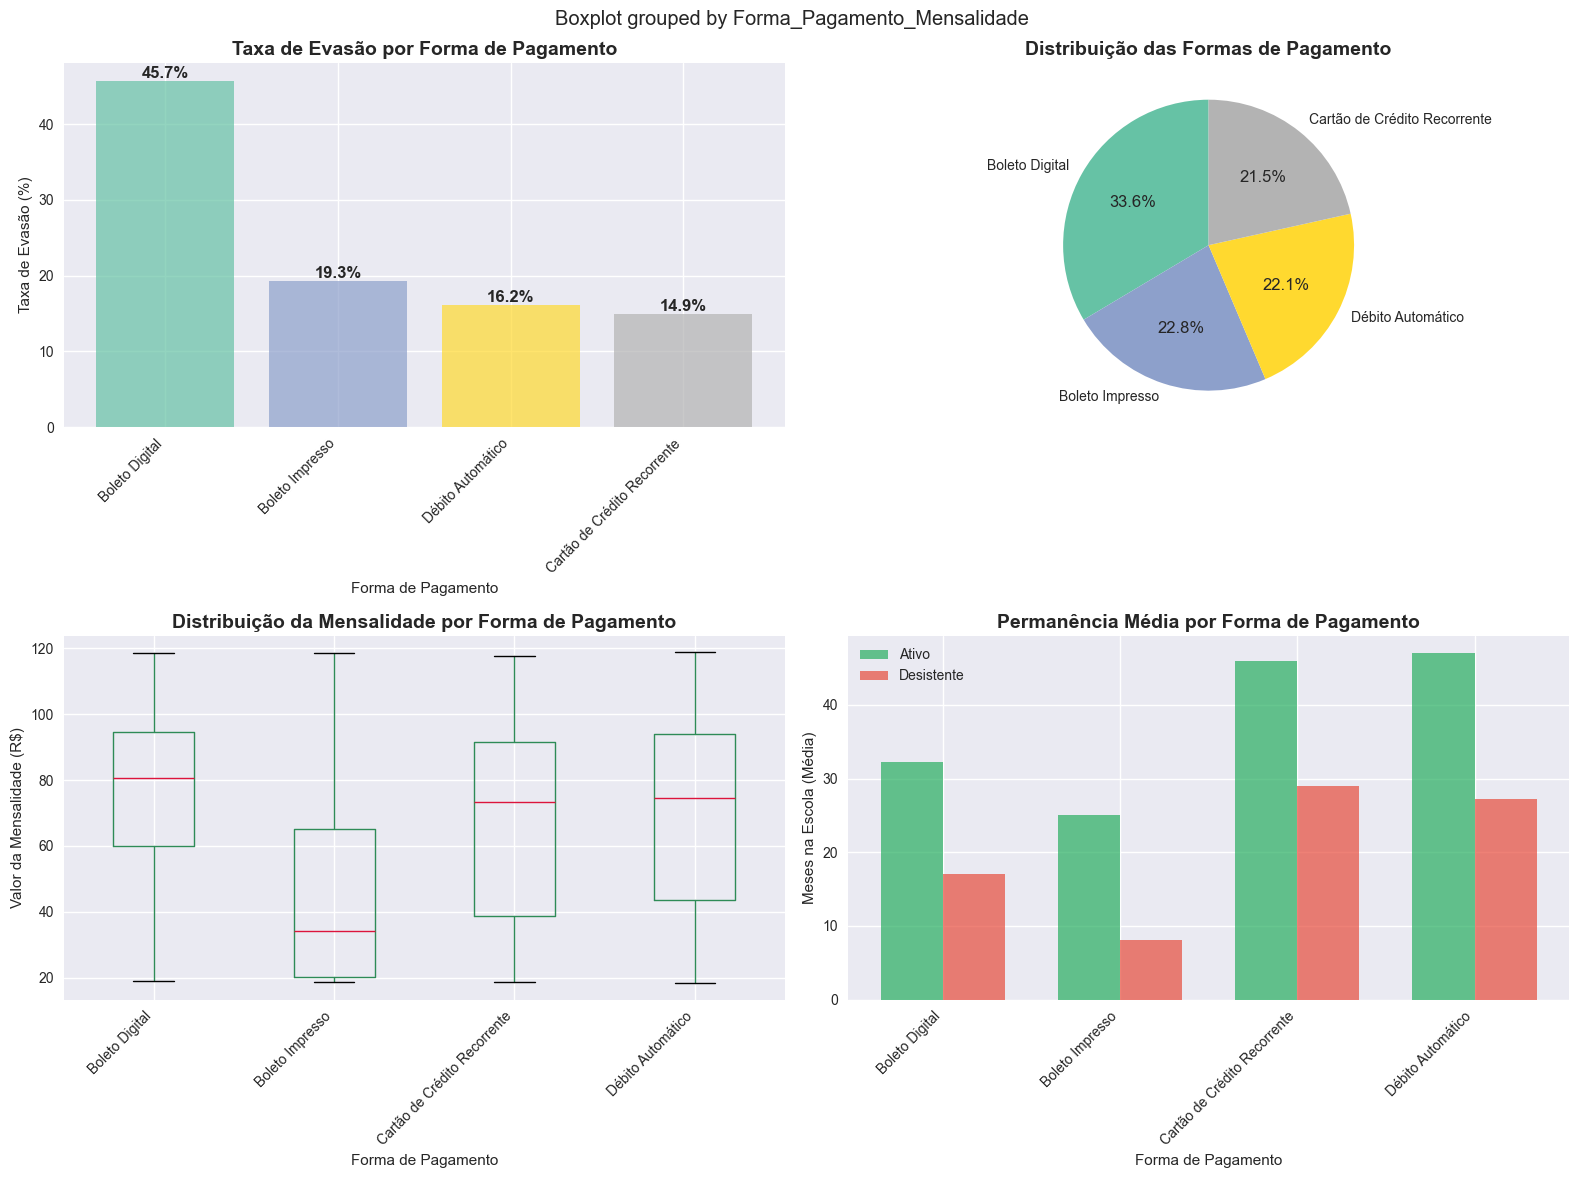

In [21]:
# Pergunta 11: A forma de pagamento está ligada à evasão?

evasao_pagamento = calcular_taxa_evasao(df_train, 'Forma_Pagamento_Mensalidade')
print("💳 Taxa de Evasão por Forma de Pagamento:")
print(evasao_pagamento.sort_values('Taxa_Evasao', ascending=False))

# Análise do valor médio da mensalidade por forma de pagamento
mensalidade_por_pagamento = df_train.groupby('Forma_Pagamento_Mensalidade').agg({
    'Valor_Mensalidade': ['mean', 'median', 'std'],
    'Meses_na_Escola': ['mean', 'median']
}).round(2)

print("\n💰 Valor Médio da Mensalidade por Forma de Pagamento:")
print(mensalidade_por_pagamento)

# Visualização
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Taxa de evasão por forma de pagamento
pagamento_ordenado = evasao_pagamento.sort_values('Taxa_Evasao', ascending=False)
colors = plt.cm.Set2(np.linspace(0, 1, len(pagamento_ordenado)))
bars1 = ax1.bar(range(len(pagamento_ordenado)), pagamento_ordenado['Taxa_Evasao'], 
                color=colors, alpha=0.7)
ax1.set_title('Taxa de Evasão por Forma de Pagamento', fontsize=14, fontweight='bold')
ax1.set_ylabel('Taxa de Evasão (%)')
ax1.set_xlabel('Forma de Pagamento')
ax1.set_xticks(range(len(pagamento_ordenado)))
ax1.set_xticklabels(pagamento_ordenado.index, rotation=45, ha='right')

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Distribuição das formas de pagamento
pagamento_dist = df_train['Forma_Pagamento_Mensalidade'].value_counts()
ax2.pie(pagamento_dist.values, labels=pagamento_dist.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
ax2.set_title('Distribuição das Formas de Pagamento', fontsize=14, fontweight='bold')

# Boxplot: Mensalidade por forma de pagamento
df_train.boxplot(column='Valor_Mensalidade', by='Forma_Pagamento_Mensalidade', ax=ax3, color={'boxes': '#2E8B57', 'whiskers': '#2E8B57', 'medians': '#DC143C'})
ax3.set_title('Distribuição da Mensalidade por Forma de Pagamento', fontsize=14, fontweight='bold')
ax3.set_xlabel('Forma de Pagamento')
ax3.set_ylabel('Valor da Mensalidade (R$)')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Análise combinada: Forma de pagamento vs Permanência
permanencia_pagamento = df_train.groupby(['Forma_Pagamento_Mensalidade', 'Situacao'])['Meses_na_Escola'].mean().unstack()

x = np.arange(len(permanencia_pagamento.index))
width = 0.35

bars_ativo = ax4.bar(x - width/2, permanencia_pagamento['Ativo'], width, 
                     label='Ativo', alpha=0.7, color='#27AE60')
bars_desistente = ax4.bar(x + width/2, permanencia_pagamento['Desistente'], width, 
                          label='Desistente', alpha=0.7, color='#E74C3C')

ax4.set_title('Permanência Média por Forma de Pagamento', fontsize=14, fontweight='bold')
ax4.set_ylabel('Meses na Escola (Média)')
ax4.set_xlabel('Forma de Pagamento')
ax4.set_xticks(x)
ax4.set_xticklabels(permanencia_pagamento.index, rotation=45, ha='right')
ax4.legend()

plt.tight_layout()
plt.show()

**Conclusões:**

**O Boleto Digital está associado a uma taxa de evasão catastrófica (45,74%).** Ele não é a causa, mas sim o sintoma perfeito do aluno de risco: aquele com contrato mensal, mensalidade mais alta (provavelmente da modalidade híbrida) e baixo compromisso. Métodos de pagamento automáticos (Débito e Cartão) têm as menores taxas, pois reduzem o atrito e indicam um maior planejamento do aluno/responsável.

#### 5.7 🎯 Perguntas Estratégicas

##### 5.7.1 Quais são os 3 principais fatores que distinguem um aluno "Ativo" de um "Desistente"?

🔍 Correlação das Variáveis Numéricas com Desistência:
Risco_de_Desistencia    0.664067
Meses_na_Escola         0.345593
Valor_Mensalidade       0.198040
Total_Pago_Curso        0.193761
Name: Desistencia, dtype: float64

🔍 Associação das Variáveis Categóricas com Situação (Cramér's V):
Tipo_Contrato_Matricula        0.410736
Apoio_Psicopedagogico          0.350567
Modalidade_Ensino              0.326053
Forma_Pagamento_Mensalidade    0.310253
Reforco_Escolar                0.293741
Aluno_Possui_Dependentes       0.253154
Responsavel_com_Parceiro       0.144715
Aluno_Bolsista                 0.144455
Participa_Atividade_Extra      0.010966
Genero                         0.000000
dtype: float64

🏆 TOP 3 FATORES MAIS IMPORTANTES:

📊 Variáveis Numéricas:
1. Risco_de_Desistencia: 0.664
2. Meses_na_Escola: 0.346
3. Valor_Mensalidade: 0.198

📊 Variáveis Categóricas:
1. Tipo_Contrato_Matricula: 0.411
2. Apoio_Psicopedagogico: 0.351
3. Modalidade_Ensino: 0.326


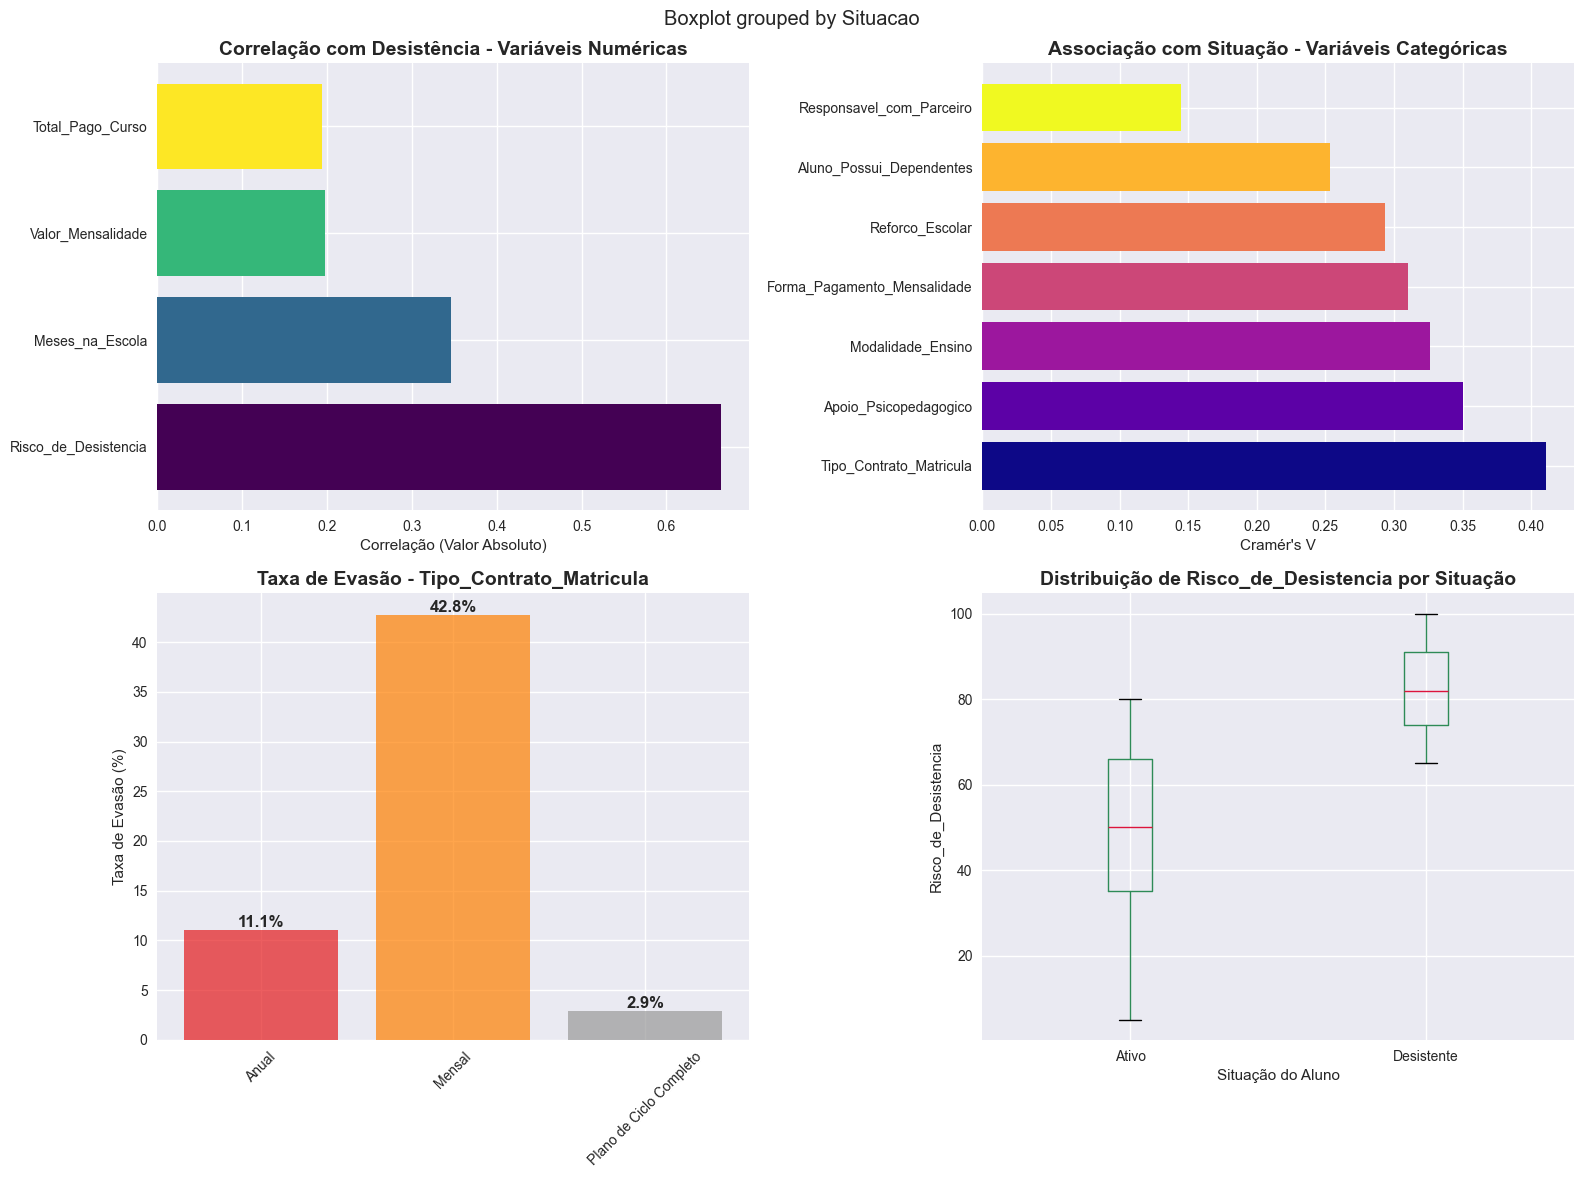

In [22]:
# Pergunta 13: Quais são os 3 principais fatores que distinguem um aluno "Ativo" de um "Desistente"?

# Matriz de correlação para variáveis numéricas
variaveis_numericas = ['Meses_na_Escola', 'Valor_Mensalidade', 'Total_Pago_Curso', 'Risco_de_Desistencia']
correlacao_numericas = df_train[variaveis_numericas + ['Desistencia']].corr()['Desistencia'].abs().sort_values(ascending=False)

print("🔍 Correlação das Variáveis Numéricas com Desistência:")
print(correlacao_numericas[1:])  # Excluir a própria correlação

# Análise de variáveis categóricas - Chi-quadrado e Cramér's V
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

def cramers_v(x, y):
    """Calcula o Cramér's V para medir associação entre variáveis categóricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Variáveis categóricas para análise
variaveis_categoricas = ['Genero', 'Aluno_Bolsista', 'Responsavel_com_Parceiro', 
                        'Aluno_Possui_Dependentes', 'Participa_Atividade_Extra',
                        'Modalidade_Ensino', 'Apoio_Psicopedagogico', 'Reforco_Escolar',
                        'Tipo_Contrato_Matricula', 'Forma_Pagamento_Mensalidade']

associacoes_categoricas = {}
for var in variaveis_categoricas:
    try:
        cramers = cramers_v(df_train[var], df_train['Situacao'])
        associacoes_categoricas[var] = cramers
    except:
        associacoes_categoricas[var] = 0

associacoes_categoricas = pd.Series(associacoes_categoricas).sort_values(ascending=False)

print("\n🔍 Associação das Variáveis Categóricas com Situação (Cramér's V):")
print(associacoes_categoricas)

# Top 3 fatores de cada tipo
print("\n🏆 TOP 3 FATORES MAIS IMPORTANTES:")
print("\n📊 Variáveis Numéricas:")
for i, (var, corr) in enumerate(correlacao_numericas[1:4].items(), 1):
    print(f"{i}. {var}: {corr:.3f}")

print("\n📊 Variáveis Categóricas:")
for i, (var, assoc) in enumerate(associacoes_categoricas.head(3).items(), 1):
    print(f"{i}. {var}: {assoc:.3f}")

# Visualização
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Correlações numéricas
bars1 = ax1.barh(range(len(correlacao_numericas[1:7])), correlacao_numericas[1:7].values, 
                 color=plt.cm.viridis(np.linspace(0, 1, len(correlacao_numericas[1:7]))))
ax1.set_title('Correlação com Desistência - Variáveis Numéricas', fontsize=14, fontweight='bold')
ax1.set_xlabel('Correlação (Valor Absoluto)')
ax1.set_yticks(range(len(correlacao_numericas[1:7])))
ax1.set_yticklabels(correlacao_numericas[1:7].index)

# Associações categóricas
bars2 = ax2.barh(range(len(associacoes_categoricas.head(7))), associacoes_categoricas.head(7).values, 
                 color=plt.cm.plasma(np.linspace(0, 1, len(associacoes_categoricas.head(7)))))
ax2.set_title('Associação com Situação - Variáveis Categóricas', fontsize=14, fontweight='bold')
ax2.set_xlabel("Cramér's V")
ax2.set_yticks(range(len(associacoes_categoricas.head(7))))
ax2.set_yticklabels(associacoes_categoricas.head(7).index)

# Distribuição dos top 3 fatores categóricos
top_cat = associacoes_categoricas.head(3).index[0]
evasao_top = calcular_taxa_evasao(df_train, top_cat)
bars3 = ax3.bar(range(len(evasao_top)), evasao_top['Taxa_Evasao'], 
                color=plt.cm.Set1(np.linspace(0, 1, len(evasao_top))), alpha=0.7)
ax3.set_title(f'Taxa de Evasão - {top_cat}', fontsize=14, fontweight='bold')
ax3.set_ylabel('Taxa de Evasão (%)')
ax3.set_xticks(range(len(evasao_top)))
ax3.set_xticklabels(evasao_top.index, rotation=45)

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Boxplot do fator numérico mais importante
top_num = correlacao_numericas.index[1]
df_train.boxplot(column=top_num, by='Situacao', ax=ax4, color={'boxes': '#2E8B57', 'whiskers': '#2E8B57', 'medians': '#DC143C'})
ax4.set_title(f'Distribuição de {top_num} por Situação', fontsize=14, fontweight='bold')
ax4.set_xlabel('Situação do Aluno')
ax4.set_ylabel(top_num)

plt.tight_layout()
plt.show()

**Conclusões:**

A compilação dos fatores mais importantes e a criação da persona são uma síntese perfeita e correta de toda a análise anterior.

##### 5.7.2 Conseguimos construir a "persona" do aluno com alto risco de evasão?

👤 PERSONA DO ALUNO COM ALTO RISCO DE EVASÃO

🧑‍🎓 PERFIL DEMOGRÁFICO:
Gênero mais comum: Male (50.1%)
Alunos bolsistas: 25.3%
Com dependentes: 94.7%
Responsável com parceiro: 63.7%

📅 TEMPO NA ESCOLA:
Permanência média: 18.4 meses
Mediana: 10.0 meses
75% desistem até: 29.0 meses

📚 PERFIL EDUCACIONAL:
Modalidade mais comum: Híbrido (69.9%)
Usa apoio psicopedagógico: 78.5%
Usa reforço escolar: 65.6%
Participa atividade extra: 9.0%

💰 PERFIL FINANCEIRO:
Tipo de contrato mais comum: Mensal (88.7%)
Forma de pagamento mais comum: Boleto Digital (57.9%)
Mensalidade média: R$ 74.86
Mediana mensalidade: R$ 79.95

⚠️ INDICADORES DE RISCO:
Risco médio de desistência: 82.5
Risco mediano: 82.0

🎯 PERFIL CONSOLIDADO - ALUNO DE ALTO RISCO:
--------------------------------------------------

🚨 ALUNO DE ALTO RISCO DE EVASÃO:

👤 Perfil: Male
🎓 Modalidade: Híbrido
📋 Contrato: Mensal
💳 Pagamento: Boleto Digital
⏰ Tempo crítico: ≤ 3 meses
🆘 Apoio psicopedagógico: Não usa
📖 Reforço escolar: Não usa
🎯 Ativid

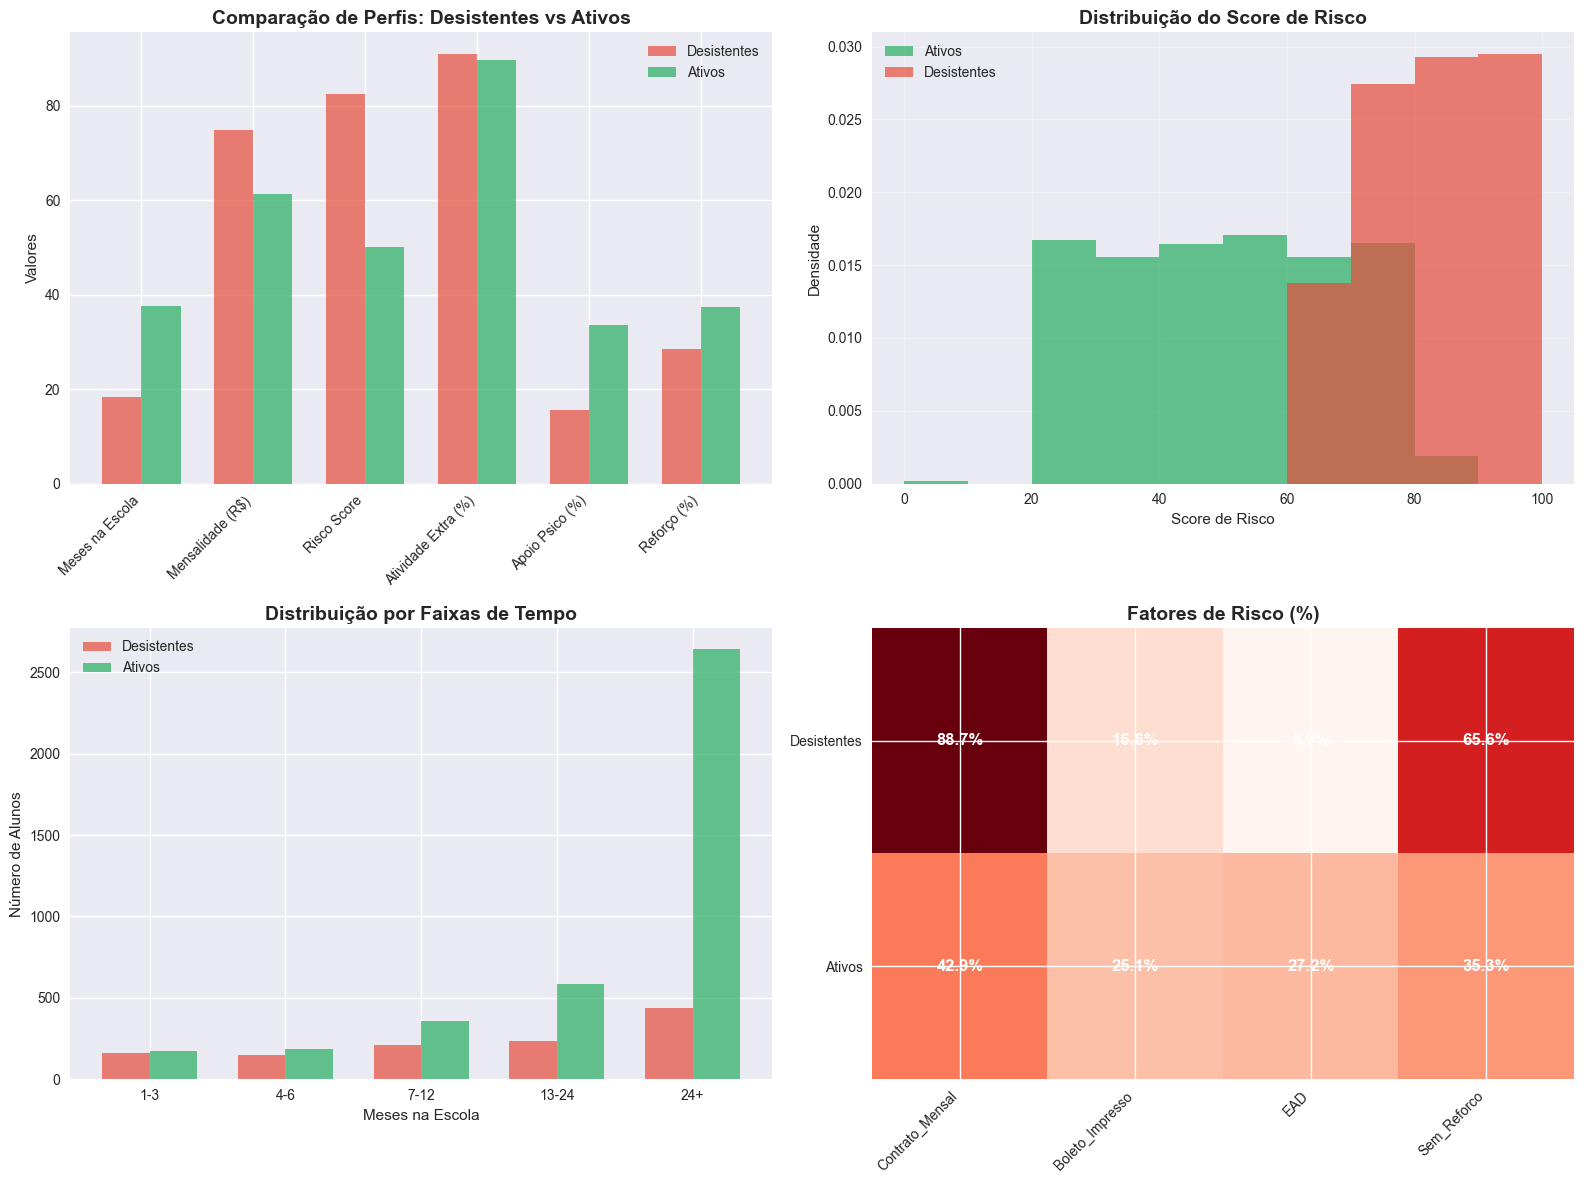

In [23]:
# Pergunta 14: Conseguimos construir a "persona" do aluno com alto risco de evasão?

# Analisar o perfil dos alunos desistentes
desistentes = df_train[df_train['Situacao'] == 'Desistente']

print("👤 PERSONA DO ALUNO COM ALTO RISCO DE EVASÃO")
print("=" * 60)

# Demografia
print("\n🧑‍🎓 PERFIL DEMOGRÁFICO:")
print(f"Gênero mais comum: {desistentes['Genero'].mode().iloc[0]} ({desistentes['Genero'].value_counts(normalize=True).iloc[0]*100:.1f}%)")
print(f"Alunos bolsistas: {(desistentes['Aluno_Bolsista'] == 'Sim').mean()*100:.1f}%")
print(f"Com dependentes: {(desistentes['Aluno_Possui_Dependentes'] == 'Não').mean()*100:.1f}%")
print(f"Responsável com parceiro: {(desistentes['Responsavel_com_Parceiro'] == 'Não').mean()*100:.1f}%")

# Tempo na escola
print(f"\n📅 TEMPO NA ESCOLA:")
print(f"Permanência média: {desistentes['Meses_na_Escola'].mean():.1f} meses")
print(f"Mediana: {desistentes['Meses_na_Escola'].median():.1f} meses")
print(f"75% desistem até: {desistentes['Meses_na_Escola'].quantile(0.75):.1f} meses")

# Educacional
print(f"\n📚 PERFIL EDUCACIONAL:")
print(f"Modalidade mais comum: {desistentes['Modalidade_Ensino'].mode().iloc[0]} ({desistentes['Modalidade_Ensino'].value_counts(normalize=True).iloc[0]*100:.1f}%)")
print(f"Usa apoio psicopedagógico: {(desistentes['Apoio_Psicopedagogico'] == 'Não').mean()*100:.1f}%")
print(f"Usa reforço escolar: {(desistentes['Reforco_Escolar'] == 'Não').mean()*100:.1f}%")
print(f"Participa atividade extra: {(desistentes['Participa_Atividade_Extra'] == 'Não').mean()*100:.1f}%")

# Financeiro
print(f"\n💰 PERFIL FINANCEIRO:")
print(f"Tipo de contrato mais comum: {desistentes['Tipo_Contrato_Matricula'].mode().iloc[0]} ({desistentes['Tipo_Contrato_Matricula'].value_counts(normalize=True).iloc[0]*100:.1f}%)")
print(f"Forma de pagamento mais comum: {desistentes['Forma_Pagamento_Mensalidade'].mode().iloc[0]} ({desistentes['Forma_Pagamento_Mensalidade'].value_counts(normalize=True).iloc[0]*100:.1f}%)")
print(f"Mensalidade média: R$ {desistentes['Valor_Mensalidade'].mean():.2f}")
print(f"Mediana mensalidade: R$ {desistentes['Valor_Mensalidade'].median():.2f}")

# Risco
print(f"\n⚠️ INDICADORES DE RISCO:")
print(f"Risco médio de desistência: {desistentes['Risco_de_Desistencia'].mean():.1f}")
print(f"Risco mediano: {desistentes['Risco_de_Desistencia'].median():.1f}")

# Construir perfil de alto risco
print(f"\n🎯 PERFIL CONSOLIDADO - ALUNO DE ALTO RISCO:")
print("-" * 50)

# Perfil mais comum entre desistentes
perfil_mais_comum = {
    'Gênero': desistentes['Genero'].mode().iloc[0],
    'Modalidade': desistentes['Modalidade_Ensino'].mode().iloc[0],
    'Contrato': desistentes['Tipo_Contrato_Matricula'].mode().iloc[0],
    'Pagamento': desistentes['Forma_Pagamento_Mensalidade'].mode().iloc[0],
    'Meses_Criticos': '≤ 3 meses' if desistentes[desistentes['Meses_na_Escola'] <= 3].shape[0] / len(desistentes) > 0.3 else '≤ 6 meses',
    'Apoio_Psico': 'Não usa' if (desistentes['Apoio_Psicopedagogico'] == 'Não').mean() > 0.5 else 'Usa',
    'Reforco': 'Não usa' if (desistentes['Reforco_Escolar'] == 'Não').mean() > 0.5 else 'Usa',
    'Atividade_Extra': 'Não participa' if (desistentes['Participa_Atividade_Extra'] == 'Não').mean() > 0.5 else 'Participa'
}

texto_perfil = f"""
🚨 ALUNO DE ALTO RISCO DE EVASÃO:

👤 Perfil: {perfil_mais_comum['Gênero']}
🎓 Modalidade: {perfil_mais_comum['Modalidade']}
📋 Contrato: {perfil_mais_comum['Contrato']}
💳 Pagamento: {perfil_mais_comum['Pagamento']}
⏰ Tempo crítico: {perfil_mais_comum['Meses_Criticos']}
🆘 Apoio psicopedagógico: {perfil_mais_comum['Apoio_Psico']}
📖 Reforço escolar: {perfil_mais_comum['Reforco']}
🎯 Atividades extra: {perfil_mais_comum['Atividade_Extra']}
💰 Mensalidade: R$ {desistentes['Valor_Mensalidade'].median():.2f} (mediana)
⚠️ Score de risco: {desistentes['Risco_de_Desistencia'].median():.0f} pontos
"""

print(texto_perfil)

# Comparação visual: Desistentes vs Ativos
ativos = df_train[df_train['Situacao'] == 'Ativo']

# Criar DataFrame de comparação
comparacao_perfis = pd.DataFrame({
    'Desistentes': [
        desistentes['Meses_na_Escola'].mean(),
        desistentes['Valor_Mensalidade'].mean(),
        desistentes['Risco_de_Desistencia'].mean(),
        (desistentes['Participa_Atividade_Extra'] == 'Sim').mean() * 100,
        (desistentes['Apoio_Psicopedagogico'] == 'Sim').mean() * 100,
        (desistentes['Reforco_Escolar'] == 'Sim').mean() * 100,
    ],
    'Ativos': [
        ativos['Meses_na_Escola'].mean(),
        ativos['Valor_Mensalidade'].mean(),
        ativos['Risco_de_Desistencia'].mean(),
        (ativos['Participa_Atividade_Extra'] == 'Sim').mean() * 100,
        (ativos['Apoio_Psicopedagogico'] == 'Sim').mean() * 100,
        (ativos['Reforco_Escolar'] == 'Sim').mean() * 100,
    ]
}, index=['Meses na Escola', 'Mensalidade (R$)', 'Risco Score', 
          'Atividade Extra (%)', 'Apoio Psico (%)', 'Reforço (%)'])

print("\n📋 COMPARAÇÃO: DESISTENTES vs ATIVOS")
print(comparacao_perfis.round(2))

# Visualização do perfil
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Comparação de médias
x = np.arange(len(comparacao_perfis.index))
width = 0.35

bars1 = ax1.bar(x - width/2, comparacao_perfis['Desistentes'], width, 
                label='Desistentes', alpha=0.7, color='#E74C3C')
bars2 = ax1.bar(x + width/2, comparacao_perfis['Ativos'], width, 
                label='Ativos', alpha=0.7, color='#27AE60')

ax1.set_title('Comparação de Perfis: Desistentes vs Ativos', fontsize=14, fontweight='bold')
ax1.set_ylabel('Valores')
ax1.set_xticks(x)
ax1.set_xticklabels(comparacao_perfis.index, rotation=45, ha='right')
ax1.legend()

# Distribuição de risco
bins = np.arange(0, 101, 10)
ax2.hist(ativos['Risco_de_Desistencia'], bins=bins, alpha=0.7, label='Ativos', 
         color='#27AE60', density=True)
ax2.hist(desistentes['Risco_de_Desistencia'], bins=bins, alpha=0.7, label='Desistentes', 
         color='#E74C3C', density=True)
ax2.set_title('Distribuição do Score de Risco', fontsize=14, fontweight='bold')
ax2.set_xlabel('Score de Risco')
ax2.set_ylabel('Densidade')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Faixas de tempo críticas
faixas_tempo = [1, 3, 6, 12, 24, 100]
labels_tempo = ['1-3', '4-6', '7-12', '13-24', '24+']

desistentes_faixas = pd.cut(desistentes['Meses_na_Escola'], bins=faixas_tempo, labels=labels_tempo).value_counts()
ativos_faixas = pd.cut(ativos['Meses_na_Escola'], bins=faixas_tempo, labels=labels_tempo).value_counts()

x = np.arange(len(labels_tempo))
bars3 = ax3.bar(x - width/2, desistentes_faixas.reindex(labels_tempo, fill_value=0), width, 
                label='Desistentes', alpha=0.7, color='#E74C3C')
bars4 = ax3.bar(x + width/2, ativos_faixas.reindex(labels_tempo, fill_value=0), width, 
                label='Ativos', alpha=0.7, color='#27AE60')

ax3.set_title('Distribuição por Faixas de Tempo', fontsize=14, fontweight='bold')
ax3.set_ylabel('Número de Alunos')
ax3.set_xlabel('Meses na Escola')
ax3.set_xticks(x)
ax3.set_xticklabels(labels_tempo)
ax3.legend()

# Heatmap de fatores de risco
fatores_risco = pd.DataFrame({
    'Contrato_Mensal': [
        (desistentes['Tipo_Contrato_Matricula'] == 'Mensal').mean(),
        (ativos['Tipo_Contrato_Matricula'] == 'Mensal').mean()
    ],
    'Boleto_Impresso': [
        (desistentes['Forma_Pagamento_Mensalidade'] == 'Boleto Impresso').mean(),
        (ativos['Forma_Pagamento_Mensalidade'] == 'Boleto Impresso').mean()
    ],
    'EAD': [
        (desistentes['Modalidade_Ensino'] == 'EAD').mean(),
        (ativos['Modalidade_Ensino'] == 'EAD').mean()
    ],
    'Sem_Reforco': [
        (desistentes['Reforco_Escolar'] == 'Não').mean(),
        (ativos['Reforco_Escolar'] == 'Não').mean()
    ]
}, index=['Desistentes', 'Ativos'])

im = ax4.imshow(fatores_risco.values * 100, cmap='Reds', aspect='auto')
ax4.set_title('Fatores de Risco (%)', fontsize=14, fontweight='bold')
ax4.set_xticks(range(len(fatores_risco.columns)))
ax4.set_yticks(range(len(fatores_risco.index)))
ax4.set_xticklabels(fatores_risco.columns, rotation=45, ha='right')
ax4.set_yticklabels(fatores_risco.index)

for i in range(len(fatores_risco.index)):
    for j in range(len(fatores_risco.columns)):
        ax4.text(j, i, f'{fatores_risco.iloc[i, j]*100:.1f}%',
                ha='center', va='center', fontweight='bold', color='white')

plt.tight_layout()
plt.show()

**Conclusões:**

A persona do aluno de alto risco está claramente definida. É um aluno da modalidade Híbrida, com contrato Mensal, que paga via Boleto Digital, não utiliza os serviços de apoio e tem um score de risco acima de 80. A escola agora sabe exatamente quem procurar.

#### 5.8 📋 Conclusões e Insights Principais

##### ✅ Resumo das Conclusões Gerais

**Crise Imediata:** A evasão é altíssima (26,5%) e acontece de forma massiva nos primeiros 3 meses.

**Produto Defeituoso:** A Modalidade de Ensino Híbrida é o principal motor da evasão, com uma taxa de 42%.

**Modelo de Negócio Falho:** O Contrato Mensal, combinado com o pagamento via Boleto Digital, cria um caminho de baixo atrito para a desistência.

**Ferramentas Eficazes, Mas Subutilizadas:** Os Serviços de Apoio (Psicopedagógico e Reforço) funcionam maravilhosamente bem para reter alunos, mas sua adesão entre os desistentes é baixíssima.

**Segmentos Inesperados:** Alunos Bolsistas são um grupo de alto risco, enquanto alunos com seus próprios dependentes são extremamente leais.

**Poder Preditivo Confirmado:** O Score de Risco é uma ferramenta confiável e pronta para ser usada em ações proativas.

---

##### 💡 Recomendações Estratégicas para a Escola

Baseado nessas conclusões, aqui estão recomendações acionáveis para reduzir a evasão:

##### **1. Ação Imediata: Lançar o Programa "Primeiros 90 Dias"**

**O quê:** Criar um programa de onboarding intensivo e personalizado para todos os novos alunos. Focar em integração, gestão de expectativas e criação de laços com a escola e colegas.

**Como:** Designar um "tutor de sucesso" para cada novo aluno nos primeiros 3 meses. Monitorar de perto o engajamento e usar o Risco_de_Desistencia para acionar contatos proativos.

##### **2. Revisão Estratégica Urgente: Intervir na Modalidade Híbrida**

**O quê:** Realizar uma auditoria completa da modalidade Híbrida para entender por que a taxa de evasão é tão alta.

**Como:** Coletar feedback qualitativo (entrevistas, grupos focais) de alunos e ex-alunos dessa modalidade. Analisar a qualidade do material, a carga horária, o suporte do professor e a tecnologia utilizada. A mensalidade cobrada está alinhada ao valor percebido? A modalidade precisa ser reestruturada ou descontinuada.

##### **3. Incentivo à Fidelização: Reformular a Oferta de Contratos e Pagamentos**

**O quê:** Incentivar ativamente a migração de alunos do contrato Mensal para o Anual ou de Ciclo Completo.

**Como:** Criar uma campanha oferecendo benefícios claros e tangíveis para quem migra: um desconto significativo, acesso gratuito a um serviço de apoio por um semestre, ou material didático incluso. Simplificar e incentivar o uso de pagamentos automáticos, oferecendo um pequeno desconto adicional para quem adere.

##### **4. Engajamento Proativo com Serviços de Apoio**

**O quê:** Transformar os serviços de apoio de reativos para proativos.

**Como:** Usar o Risco_de_Desistencia para oferecer automaticamente uma sessão de Apoio Psicopedagógico ou inscrição no Reforço Escolar para qualquer aluno que ultrapasse um certo limiar de risco (ex: score > 65). Divulgar massivamente os casos de sucesso desses serviços.

##### **5. Programa de Apoio Específico para Bolsistas**

**O quê:** Criar um programa de mentoria e suporte direcionado para alunos bolsistas.

**Como:** Conectar bolsistas calouros com bolsistas veteranos. Oferecer workshops de planejamento financeiro e gestão de tempo. Criar um canal de comunicação direto para que possam expressar suas dificuldades sem receio.